# Workflow

1. [Load Original Datasets](#Load-Original-Datasets) 
2. [Preprocess Data](#Preprocess-Data)  
3. [Visualise Data](#Visualise-Data)  
   - 3.1 [Numerical values](#Numerical-values)
   - 3.2 [Categorical values](#Categorical-values)
4. [Feature Engineering (Distance from each city to the city centre)](#Feature-Engineering)  
5. [Finalise a CSV](#Finalise-a-CSV)  
6. [Task 1](#Task-1)  
   - 6.1 [Task 1(a) Data understanding: Attributes of high-priced properties (Discrete variables)](#Task-1a)  
   - 6.2 [Task 1(b) Data understanding: Correlation](#Task-1b)  
   - 6.3 [Task 1(c) Modelling: Predictors of price](#Task-1c) 

In [1]:
!pip install geopy

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from typing import Dict, List, Tuple, Optional
from collections import Counter
import re

# Display
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Calculation of distance
from geopy.distance import geodesic

# Preprocess, Statistics, and Training
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import levene, ttest_ind, pearsonr

# Modelling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Evaluation criteria
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, make_scorer
)

# Feature importance
from sklearn.inspection import permutation_importance

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Load Original Datasets <a id="Load-Original-Datasets"></a>

In [3]:
train_df = pd.read_csv('apartment_for_rent_train.csv')
test_df = pd.read_csv('apartment_for_rent_test.csv')

In [4]:
train_df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,NaN,Major Renovation,11.0,11.0,10.0,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,none,none,none
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,NaN,Euro Renovation,11.0,11.0,10.0,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,none,none,none
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,11.0,11.0,10.0,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,none,none,none
3,7,Female,57,NaN,0.0,0.0,-1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,"Lernagorts Street, Vardenis",80000.0,AMD,monthly,15/12/2022,none,none,none
4,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,NaN,Euro Renovation,0.0,0.0,0.0,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,none,none,none


In [5]:
test_df.head()

,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1,Female,34,Stone,0,0,5,60.0,2,1,2.75,4,Closed balcony,NaN,Euro Renovation,10,10,10,"Papazyan, st",430000,AMD,monthly,24/11/2022,none,none,none
1,1,Male,52,Stone,0,0,5,82.0,4,1,2.75,5,Open balcony,NaN,Old Renovation,0,0,0,Yerevan › Arabkir,280000,AMD,monthly,24/11/2022,none,none,none
2,9,Female,30,Stone,0,0,4,54.0,2,1,2.70,4,Closed balcony,Available,Partial Renovation,11,10,10,Aragatsotn › Aparan,50000,AMD,monthly,15/12/2022,none,none,none
3,9,Female,21,Stone,0,0,4,73.0,2,1,2.70,3,Multiple balconies,Available,Designer Renovation,11,10,10,Aragatsotn › Aparan,60000,AMD,monthly,15/12/2022,none,none,none
4,9,Female,41,Stone,0,0,5,72.0,3,1,3.00,1,Closed balcony,Available,Major Renovation,11,10,11,"Տիգրան Մեծի փողոց 46, Աշտարակ",16000,AMD,daily,15/12/2022,none,none,none


# 2. Preprocess Data <a id="Preprocess-Data"></a>

## Clean columns

In [6]:
# Shape (train_df)
print("train_df: ", train_df.shape)

# Shape (test_df)
print("test_df: ", test_df.shape)

train_df:  (32587, 26)
test_df:  (8147, 26)


In [7]:
# Correct the name of each column in test_df
if list(train_df.columns) != list(test_df.columns):
    print("   ⚠️  Column mismatch detected - aligning columns...")
    test_df_aligned = test_df.copy()
    test_df_aligned.columns = train_df.columns
    print("   ✅ Columns aligned")
else:
    test_df_aligned = test_df.copy()
    print("   ✅ Columns already match")

   ⚠️  Column mismatch detected - aligning columns...
   ✅ Columns aligned


In [8]:
test_df_aligned.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking
0,1,Female,34,Stone,0,0,5,60.0,2,1,2.75,4,Closed balcony,NaN,Euro Renovation,10,10,10,"Papazyan, st",430000,AMD,monthly,24/11/2022,none,none,none
1,1,Male,52,Stone,0,0,5,82.0,4,1,2.75,5,Open balcony,NaN,Old Renovation,0,0,0,Yerevan › Arabkir,280000,AMD,monthly,24/11/2022,none,none,none
2,9,Female,30,Stone,0,0,4,54.0,2,1,2.70,4,Closed balcony,Available,Partial Renovation,11,10,10,Aragatsotn › Aparan,50000,AMD,monthly,15/12/2022,none,none,none
3,9,Female,21,Stone,0,0,4,73.0,2,1,2.70,3,Multiple balconies,Available,Designer Renovation,11,10,10,Aragatsotn › Aparan,60000,AMD,monthly,15/12/2022,none,none,none
4,9,Female,41,Stone,0,0,5,72.0,3,1,3.00,1,Closed balcony,Available,Major Renovation,11,10,11,"Տիգրան Մեծի փողոց 46, Աշտարակ",16000,AMD,daily,15/12/2022,none,none,none


## Merge two datasets 
### The reason why merging two datasets is because we plan to use 10-fold cross-validation for training and testing the models later; therefore, the dataset should be merged to carry out it.

In [10]:
# Add source identifier
train_df['data_source'] = 'train'
test_df_aligned['data_source'] = 'test'

# Merge datasets
combined_df = pd.concat([train_df, test_df_aligned], ignore_index=True, sort=False)

print(f"✅ Datasets merged successfully:")
print(f"   Total rows: {len(combined_df):,}")
print(f"   Train rows: {(combined_df['data_source'] == 'train').sum():,}")
print(f"   Test rows: {(combined_df['data_source'] == 'test').sum():,}")

✅ Datasets merged successfully:
   Total rows: 40,734
   Train rows: 32,587
   Test rows: 8,147


In [11]:
combined_df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,NaN,Major Renovation,11.0,11.0,10.0,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,none,none,none,train
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,NaN,Euro Renovation,11.0,11.0,10.0,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,none,none,none,train
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,11.0,11.0,10.0,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,none,none,none,train
3,7,Female,57,NaN,0.0,0.0,-1.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,"Lernagorts Street, Vardenis",80000.0,AMD,monthly,15/12/2022,none,none,none,train
4,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,NaN,Euro Renovation,0.0,0.0,0.0,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,none,none,none,train


## Addressing missing values

In [12]:
# Check missing values ('True' means including missing values)
combined_df.isnull().any()

Reg_id                    False
Gender                    False
Age                       False
Construction_type          True
New_construction           True
Elevator                   True
Floors_in_the_building     True
Floor_area                 True
Number_of_rooms            True
Number_of_bathrooms        True
Ceiling_height             True
Floor                      True
Balcony                    True
Furniture                  True
Renovation                 True
Children_are_welcome       True
Pets_allowed               True
Utility_payments           True
Address                    True
Price                      True
Currency                   True
Duration                   True
Datetime                   True
amenities                  True
appliances                 True
parking                    True
data_source               False
dtype: bool

In [13]:
combined_df.isnull().sum()

Reg_id                        0
Gender                        0
Age                           0
Construction_type             7
New_construction              2
Elevator                      2
Floors_in_the_building        1
Floor_area                   10
Number_of_rooms               2
Number_of_bathrooms           3
Ceiling_height                3
Floor                         2
Balcony                      11
Furniture                 12441
Renovation                    9
Children_are_welcome        559
Pets_allowed                559
Utility_payments            559
Address                       2
Price                         2
Currency                      2
Duration                      2
Datetime                      2
amenities                  5132
appliances                 5126
parking                    5697
data_source                   0
dtype: int64

In [14]:
null = pd.DataFrame({'Null Values': combined_df.isna().sum(), 
                     'Persentage Null Values': (combined_df.isna().sum()) / (combined_df.shape[0]) * (100)})
null

,Null Values,Persentage Null Values
Reg_id,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Construction_type,7,0.017185
New_construction,2,0.004910
Elevator,2,0.004910
Floors_in_the_building,1,0.002455
Floor_area,10,0.024550
Number_of_rooms,2,0.004910
Number_of_bathrooms,3,0.007365


In [15]:
# The rows with under 15% missing values are deleted.  
combined_df = combined_df.dropna(subset = ['Construction_type', 
                                           'New_construction', 
                                           'Elevator', 
                                           'Floors_in_the_building', 
                                           'Floor_area', 
                                           'Number_of_rooms', 
                                           'Number_of_bathrooms', 
                                           'Ceiling_height', 
                                           'Floor',
                                           'Balcony', 
                                           'Renovation', 
                                           'Children_are_welcome', 
                                           'Pets_allowed', 
                                           'Utility_payments', 
                                           'Address',
                                           'Price', 
                                           'Currency', 
                                           'Duration',
                                           'Datetime', 
                                           'amenities', 
                                           'appliances',
                                           'parking'])
print("After dropping the rows with NaN (except for Furniture): ")
print(combined_df.shape)

After dropping the rows with NaN (except for Furniture): 
(34807, 27)


In [16]:
null = pd.DataFrame({'Null Values': combined_df.isna().sum(), 
                     'Persentage Null Values': (combined_df.isna().sum()) / (combined_df.shape[0]) * (100)})
null

,Null Values,Persentage Null Values
Reg_id,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Construction_type,0,0.000000
New_construction,0,0.000000
Elevator,0,0.000000
Floors_in_the_building,0,0.000000
Floor_area,0,0.000000
Number_of_rooms,0,0.000000
Number_of_bathrooms,0,0.000000


In [17]:
combined_df = combined_df.fillna({'Furniture':'Unknown'})
combined_df.head(10)

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,Unknown,Major Renovation,11.0,11.0,10.0,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,none,none,none,train
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,Unknown,Euro Renovation,11.0,11.0,10.0,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,none,none,none,train
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,11.0,11.0,10.0,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,none,none,none,train
4,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,Unknown,Euro Renovation,0.0,0.0,0.0,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,none,none,none,train
6,5,Female,61,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,Unknown,Cosmetic Renovation,11.0,11.0,10.0,"13th street, Gyumri",200000.0,AMD,monthly,15/12/2022,none,none,none,train
8,1,Male,52,Monolith,1.0,1.0,18.0,55.0,2.0,1.0,3.0,16.0,Open balcony,Unknown,Designer Renovation,10.0,10.0,10.0,"Aram Street 107, Yerevan",1000.0,USD,monthly,24/11/2022,none,none,none,train
9,1,Female,32,Panels,0.0,1.0,9.0,70.0,2.0,1.0,2.8,8.0,Closed balcony,Unknown,Major Renovation,11.0,10.0,10.0,"Sayat Nova avenue, Yerevan",1200.0,USD,monthly,24/11/2022,none,none,none,train
10,1,Male,18,Monolith,1.0,1.0,16.0,96.0,3.0,2.0,3.0,9.0,Open balcony,Unknown,Designer Renovation,0.0,0.0,0.0,"Aram Street, Yerevan",2200.0,USD,monthly,24/11/2022,none,none,none,train
11,1,Male,59,Monolith,1.0,1.0,15.0,85.0,3.0,1.0,2.8,7.0,Open balcony,Available,Major Renovation,11.0,10.0,10.0,"Aram Street, Yerevan",1300.0,USD,monthly,24/11/2022,none,none,none,train
12,1,Male,66,Panels,0.0,1.0,10.0,50.0,2.0,1.0,2.8,2.0,Open balcony,Unknown,Major Renovation,0.0,0.0,0.0,"Gyulbenkyan street, Yerevan",900.0,USD,monthly,24/11/2022,none,none,none,train


In [18]:
null = pd.DataFrame({'Null Values': combined_df.isna().sum(), 
                     'Persentage Null Values': (combined_df.isna().sum()) / (combined_df.shape[0]) * (100)})
null

,Null Values,Persentage Null Values
Reg_id,0,0.0
Gender,0,0.0
Age,0,0.0
Construction_type,0,0.0
New_construction,0,0.0
Elevator,0,0.0
Floors_in_the_building,0,0.0
Floor_area,0,0.0
Number_of_rooms,0,0.0
Number_of_bathrooms,0,0.0


## Addressing data entry error  (except for address)

In [19]:
# Check unique values to see data entry error
cols = []
cols = combined_df.columns
print("Before making any changes")
print("=====================")
for col in cols:
    print("=====================")
    print(combined_df[col].value_counts())

Before making any changes
1     32793
4       551
5       527
2       212
6       212
10      198
3        88
11       71
7        65
8        38
9        27
13       15
12       10
Name: Reg_id, dtype: int64
Female    17461
Male      17346
Name: Gender, dtype: int64
30    710
23    704
31    698
45    696
25    694
68    688
62    688
51    688
32    687
39    686
18    684
63    680
19    677
61    676
33    674
35    673
42    672
60    671
47    669
56    668
59    666
26    665
52    665
41    664
43    663
22    662
28    660
21    659
37    657
34    657
65    656
55    655
69    648
58    648
48    647
66    641
57    639
38    635
49    633
54    633
24    633
67    632
44    631
40    631
70    631
64    630
53    629
50    627
36    620
46    615
20    608
29    592
27    592
Name: Age, dtype: int64
Monolith    13984
Stone       12067
Panels       6953
stone         734
monolith      506
panels        451
Bricks         65
Cassette       37
bricks          4
cassette        

In [20]:
# Correct mistakes of data entry
combined_df = combined_df.replace({'Construction_type': {'monolith': 'Monolith', 'stone': 'Stone', 'panels': 'Panels',
                                                 'bricks': 'Bricks', 'cassette': 'Cassette'}, 
                           'Balcony': {'open_balcony': 'Open balcony', 'closed_balcony': 'Closed balcony',
                                       'multiple_balconies': 'Multiple balconies', 'not_available': 'Not available'},
                           'Renovation': {'major_renovation': 'Major Renovation', 'designer_renovation': 'Designer Renovation',
                                          'euro_renovation': 'Euro Renovation', 'cosmetic_renovation': 'Cosmetic Renovation',
                                          'old_renovation': 'Old Renovation', 'partial_renovation': 'Partial Renovation',
                                          'no_renovation': 'No Renovation'},
                           'Furniture': {'partial_furniture': 'Partial Furniture'}
                          })

In [21]:
df = combined_df.copy()

# Process missing values
df['amenities'] = df['amenities'].fillna('')
df['appliances'] = df['appliances'].fillna('')
df['parking'] = df['parking'].fillna('')

# Prepare for getting dummies
df['amenities'] = df['amenities'].str.replace('none', '').str.replace('<NA>', '')
df['appliances'] = df['appliances'].str.replace('none', '').str.replace('<NA>', '')
df['parking'] = df['parking'].str.replace('none', '').str.replace('<NA>', '')

# Get dummies
amenities_dummies = df['amenities'].str.get_dummies(sep=',')
appliances_dummies = df['appliances'].str.get_dummies(sep=',')
parking_dummies = df['parking'].str.get_dummies(sep=',')

# Name understandable columns
amenities_dummies = amenities_dummies.add_prefix('amenity_')
appliances_dummies = appliances_dummies.add_prefix('appliance_')
parking_dummies = parking_dummies.add_prefix('parking_')

# Merge
df = pd.concat([df, amenities_dummies, appliances_dummies, parking_dummies], axis=1)

In [22]:
# Extract the columns with dummies
dummy_cols = [col for col in df.columns if col.startswith(('amenity_', 'appliance_', 'parking_'))]

# Normalisation
normalised_columns = {col: col.replace('__', '_') for col in dummy_cols}

# Merge the redundant columns
merged_data = pd.DataFrame(index=df.index)

for original_col, normalised_col in normalised_columns.items():
    if normalised_col not in merged_data.columns:
        merged_data[normalised_col] = df[original_col]
    else:
        merged_data[normalised_col] = merged_data[normalised_col].fillna(0) | df[original_col].fillna(0)

# Merge
non_dummy_df = df.drop(columns=dummy_cols)
df = pd.concat([non_dummy_df, merged_data], axis=1)

In [23]:
# Balcony
df['Balcony'] = df['Balcony'].replace({'0': 'Unknown'})
# Furniture
df['Furniture'] = df['Furniture'].replace({'0': 'Unknown', '1': 'Unknown', '2': 'Unknown'})

In [24]:
def map_permission_column(col):
    col = col.astype(str)  # Change the data type (to string)
    return col.replace({
        '0.0': 'Not allowed',
        '1.0': 'Allowed',
        '2.0': 'By agreement',
        '10.0': 'Unknown',
        '11.0': 'Unknown',
        '12.0': 'Unknown'
    })
df['Children_are_welcome'] = map_permission_column(df['Children_are_welcome'])
df['Pets_allowed'] = map_permission_column(df['Pets_allowed'])
df['Utility_payments'] = map_permission_column(df['Utility_payments'])

In [25]:
cols = []
cols = df.columns
print("After making changes")
print("=====================")
for col in cols:
    print("=====================")
    print(df[col].value_counts())

After making changes
1     32793
4       551
5       527
2       212
6       212
10      198
3        88
11       71
7        65
8        38
9        27
13       15
12       10
Name: Reg_id, dtype: int64
Female    17461
Male      17346
Name: Gender, dtype: int64
30    710
23    704
31    698
45    696
25    694
68    688
62    688
51    688
32    687
39    686
18    684
63    680
19    677
61    676
33    674
35    673
42    672
60    671
47    669
56    668
59    666
26    665
52    665
41    664
43    663
22    662
28    660
21    659
37    657
34    657
65    656
55    655
69    648
58    648
48    647
66    641
57    639
38    635
49    633
54    633
24    633
67    632
44    631
40    631
70    631
64    630
53    629
50    627
36    620
46    615
20    608
29    592
27    592
Name: Age, dtype: int64
Monolith    14490
Stone       12801
Panels       7404
Bricks         69
Cassette       41
Wooden          2
Name: Construction_type, dtype: int64
0.0    19508
1.0    15299
Name: New_c

In [26]:
df.to_csv("cleaned_df_v0.1.csv", index=False)

## Addressing data entry error (Variable: 'Address')

### The top-10 population cities in Republic of Albania

1. 'Yerevan': ['Yerevan', 'Երևան', 'Ереван'],
2. 'Gyumri': ['Gyumri', 'Գյումրի', 'Гюмри'],
3. 'Vanadzor': ['Vanadzor', 'Վանաձոր', 'Ванадзор'],
4. 'Vagharshapat': ['Vagharshapat', 'Վաղարշապատ', 'Вагаршапат', 'Echmiadzin', 'Էջմիածին', 'Эчмиадзин'],
5. 'Hrazdan': ['Hrazdan', 'Հրազդան', 'Раздан'],
6. 'Kapan': ['Kapan', 'Կապան', 'Капан'],
7. 'Abovyan': ['Abovyan', 'Աբովյան', 'Абовян'],
8. 'Armavir': ['Armavir', 'Արմավիր', 'Армавир'],
9. 'Charentsavan': ['Charentsavan', 'Չարենցավան', 'Чаренцаван'],
10. 'Masis': ['Masis', 'Մասիս', 'Масис']

In [27]:
# Load data
df = pd.read_csv('cleaned_df_v0.1.csv')

print("=== CREATING BINARY FLAGS FOR MAJOR CITIES (MULTILINGUAL) ===\n")

# Define major cities with their variations in different languages
city_variations = {
    'Yerevan': ['Yerevan', 'Երևան', 'Ереван'],
    'Gyumri': ['Gyumri', 'Գյումրի', 'Гюмри'],
    'Vanadzor': ['Vanadzor', 'Վանաձոր', 'Ванадзор'],
    'Vagharshapat': ['Vagharshapat', 'Վաղարշապատ', 'Вагаршапат', 'Echmiadzin', 'Էջմիածին', 'Эчмиадзин'],
    'Hrazdan': ['Hrazdan', 'Հրազդան', 'Раздан'],
    'Kapan': ['Kapan', 'Կապան', 'Капан'],
    'Abovyan': ['Abovyan', 'Աբովյան', 'Абовян'],
    'Armavir': ['Armavir', 'Արմավիր', 'Армавир'],
    'Charentsavan': ['Charentsavan', 'Չարենցավան', 'Чаренцаван'],
    'Masis': ['Masis', 'Մասիս', 'Масис']
}

# Create binary flags for each city (using English column names)
for city_en, variations in city_variations.items():
    # Create a regex pattern that matches any of the variations
    pattern = '|'.join(variations)
    
    # Check if any variation appears in the address
    df[f'city_{city_en}'] = df['Address'].str.contains(
        pattern, 
        case=False, 
        na=False,
        regex=True
    ).astype(int)
    
    # Count how many addresses contain this city
    count = df[f'city_{city_en}'].sum()
    percentage = count / len(df) * 100
    print(f"{city_en}: {count:,} addresses ({percentage:.1f}%)")
    
    # Show which variations were found
    if count > 0:
        for var in variations:
            var_count = df['Address'].str.contains(var, case=False, na=False).sum()
            if var_count > 0:
                print(f"  - '{var}': {var_count:,}")

# Create a flag for addresses that don't contain any of the major cities
major_cities = list(city_variations.keys())
df['city_other'] = (~(df[[f'city_{city}' for city in major_cities]].any(axis=1))).astype(int)
other_count = df['city_other'].sum()
print(f"\nOther (no major city): {other_count:,} addresses ({other_count/len(df)*100:.1f}%)")

# Verify with examples
print("\n=== VERIFICATION: Sample Addresses ===")
sample_indices = [0, 1, 2, 3, 4, 5, 100, 200, 300]
sample_cols = ['Address'] + [f'city_{city}' for city in major_cities] + ['city_other']

print("\nSample results:")
print(df.loc[sample_indices, sample_cols].head(10))

# Check for overlaps (addresses containing multiple cities)
print("\n=== CHECKING FOR OVERLAPS ===")
city_flags = df[[f'city_{city}' for city in major_cities]]
multiple_cities = (city_flags.sum(axis=1) > 1).sum()
print(f"Addresses with multiple major cities: {multiple_cities}")

if multiple_cities > 0:
    # Show examples of addresses with multiple cities
    multi_city_mask = city_flags.sum(axis=1) > 1
    print("\nExamples of addresses with multiple cities:")
    print(df[multi_city_mask][sample_cols].head(5))

# Summary statistics
print("\n=== SUMMARY STATISTICS ===")
print("\nCity flag distribution:")
total_flagged = 0
for city in major_cities:
    count = df[f'city_{city}'].sum()
    total_flagged += count
    print(f"  city_{city}: {count:,}")
print(f"  city_other: {df['city_other'].sum():,}")
print(f"\nTotal addresses with identified cities: {len(df) - df['city_other'].sum():,} ({(len(df) - df['city_other'].sum())/len(df)*100:.1f}%)")

# Save the updated dataframe
df.to_csv('cleaned_df_v0.2.csv', index=False)
print(f"\n✅ Saved to 'cleaned_df_v0.2.csv'")
print(f"Added columns: {[f'city_{city}' for city in major_cities] + ['city_other']}")

# Additional analysis: Show examples from each category
print("\n=== EXAMPLES FROM EACH CATEGORY ===")
for city in major_cities[:5]:  # Show first 5 cities
    if df[f'city_{city}'].sum() > 0:
        print(f"\n{city} examples:")
        city_examples = df[df[f'city_{city}'] == 1]['Address'].head(3)
        for i, addr in enumerate(city_examples, 1):
            print(f"  {i}. {addr}")

print("\nOther (no major city) examples:")
other_examples = df[df['city_other'] == 1]['Address'].head(5)
for i, addr in enumerate(other_examples, 1):
    print(f"  {i}. {addr}")

# Final check: Show distribution of languages detected
print("\n=== LANGUAGE DISTRIBUTION IN MATCHED CITIES ===")
for city_en, variations in list(city_variations.items())[:5]:  # Top 5 cities
    if df[f'city_{city_en}'].sum() > 0:
        print(f"\n{city_en}:")
        for i, var in enumerate(variations):
            var_count = df[df[f'city_{city_en}'] == 1]['Address'].str.contains(var, case=False, na=False).sum()
            if var_count > 0:
                lang = "English" if i == 0 else ("Armenian" if i == 1 else "Russian")
                print(f"  {lang} ('{var}'): {var_count:,}")

=== CREATING BINARY FLAGS FOR MAJOR CITIES (MULTILINGUAL) ===

Yerevan: 32,754 addresses (94.1%)
  - 'Yerevan': 28,602
  - 'Երևան': 3,529
  - 'Ереван': 623
Gyumri: 525 addresses (1.5%)
  - 'Gyumri': 294
  - 'Գյումրի': 174
  - 'Гюмри': 57
Vanadzor: 183 addresses (0.5%)
  - 'Vanadzor': 139
  - 'Վանաձոր': 33
  - 'Ванадзор': 11
Vagharshapat: 162 addresses (0.5%)
  - 'Vagharshapat': 39
  - 'Վաղարշապատ': 31
  - 'Вагаршапат': 8
  - 'Echmiadzin': 84
Hrazdan: 78 addresses (0.2%)
  - 'Hrazdan': 43
  - 'Հրազդան': 25
  - 'Раздан': 10
Kapan: 18 addresses (0.1%)
  - 'Kapan': 11
  - 'Կապան': 7
Abovyan: 676 addresses (1.9%)
  - 'Abovyan': 622
  - 'Աբովյան': 45
  - 'Абовян': 9
Armavir: 109 addresses (0.3%)
  - 'Armavir': 107
  - 'Արմավիր': 1
  - 'Армавир': 1
Charentsavan: 18 addresses (0.1%)
  - 'Charentsavan': 8
  - 'Չարենցավան': 10
Masis: 33 addresses (0.1%)
  - 'Masis': 21
  - 'Մասիս': 10
  - 'Масис': 2

Other (no major city): 962 addresses (2.8%)

=== VERIFICATION: Sample Addresses ===

Sample resu

## Addressing data alignment (Different 'Currency' and 'Duration')
### Will make 'Price_Monthly_USD' to align all price data for predicting the value.

In [2]:
# Load data
df = pd.read_csv('cleaned_df_v0.2.csv')

print("=== STANDARDISING CURRENCY AND DURATION FOR COMPARISON ===\n")

# Check current distribution
print("Current Currency distribution:")
print(df['Currency'].value_counts())
print(f"\nCurrent Duration distribution:")
print(df['Duration'].value_counts())

# Define exchange rates to USD (approximate rates - update as needed)
exchange_rates = {
    'USD': 1.0,
    'AMD': 0.0026,  # 1 AMD = 0.0026 USD (approx 385 AMD per USD)
    'EUR': 1.10,    # 1 EUR = 1.10 USD
    'RUB': 0.011    # 1 RUB = 0.011 USD (approx 90 RUB per USD)
}

print("\n=== CURRENCY CONVERSION ===")
print("Exchange rates to USD:")
for currency, rate in exchange_rates.items():
    print(f"  {currency}: {rate}")

# Store original values
df['Price_original'] = df['Price'].copy()
df['Currency_original'] = df['Currency'].copy()
df['Duration_original'] = df['Duration'].copy()

# Convert all prices to USD
df['Price_USD'] = df['Price'].copy()

for currency, rate in exchange_rates.items():
    mask = df['Currency'] == currency
    count = mask.sum()
    if count > 0:
        df.loc[mask, 'Price_USD'] = df.loc[mask, 'Price'] * rate
        print(f"\nConverted {count:,} prices from {currency} to USD")
        
        # Show sample conversions
        if count > 0:
            sample = df[mask].head(3)
            print("Sample conversions:")
            for idx in sample.index[:3]:
                original = df.loc[idx, 'Price_original']
                converted = df.loc[idx, 'Price_USD']
                print(f"  {original:,.0f} {currency} → ${converted:,.2f} USD")

# Handle any missing currencies
unknown_currencies = df[~df['Currency'].isin(exchange_rates.keys())]['Currency'].unique()
if len(unknown_currencies) > 0:
    print(f"\nWarning: Unknown currencies found: {unknown_currencies}")
    # Set to NaN for unknown currencies
    df.loc[~df['Currency'].isin(exchange_rates.keys()), 'Price_USD'] = np.nan

print("\n=== DURATION STANDARDISATION ===")

# Define duration conversions to monthly
duration_factors = {
    'daily': 30,      # Daily price × 30 = Monthly price
    'weekly': 4.33,   # Weekly price × 4.33 = Monthly price (52 weeks / 12 months)
    'monthly': 1,     # Already monthly
    'yearly': 1/12    # Yearly price ÷ 12 = Monthly price
}

print("Duration conversion factors to monthly:")
for duration, factor in duration_factors.items():
    print(f"  {duration}: ×{factor}")

# Convert all durations to monthly equivalent
df['Price_Monthly_USD'] = df['Price_USD'].copy()

for duration, factor in duration_factors.items():
    mask = df['Duration'].str.lower() == duration
    count = mask.sum()
    if count > 0:
        df.loc[mask, 'Price_Monthly_USD'] = df.loc[mask, 'Price_USD'] * factor
        print(f"\nConverted {count:,} {duration} prices to monthly equivalent")
        
        # Show sample conversions
        sample = df[mask].head(3)
        if len(sample) > 0:
            print("Sample conversions:")
            for idx in sample.index[:3]:
                original = df.loc[idx, 'Price_USD']
                monthly = df.loc[idx, 'Price_Monthly_USD']
                print(f"  ${original:,.2f} {duration} → ${monthly:,.2f} monthly")

# Create price per day for additional comparison
df['Price_Daily_USD'] = df['Price_Monthly_USD'] / 30

# Summary statistics
print("\n=== STANDARDISED PRICE STATISTICS ===")
print(f"\nPrice_Monthly_USD summary:")
print(f"  Count: {df['Price_Monthly_USD'].notna().sum():,}")
print(f"  Mean: ${df['Price_Monthly_USD'].mean():,.2f}")
print(f"  Median: ${df['Price_Monthly_USD'].median():,.2f}")
print(f"  Min: ${df['Price_Monthly_USD'].min():,.2f}")
print(f"  Max: ${df['Price_Monthly_USD'].max():,.2f}")

# Check for outliers
print("\n=== OUTLIER CHECK ===")
Q1 = df['Price_Monthly_USD'].quantile(0.25)
Q3 = df['Price_Monthly_USD'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_low = (df['Price_Monthly_USD'] < lower_bound).sum()
outliers_high = (df['Price_Monthly_USD'] > upper_bound).sum()

print(f"IQR method outliers:")
print(f"  Below ${lower_bound:,.2f}: {outliers_low:,} properties")
print(f"  Above ${upper_bound:,.2f}: {outliers_high:,} properties")

# Flag extreme values
df['price_is_extreme'] = (
    (df['Price_Monthly_USD'] < 50) |    # Less than $50/month seems too low
    (df['Price_Monthly_USD'] > 10000)    # More than $10,000/month seems too high
).astype(int)

extreme_count = df['price_is_extreme'].sum()
print(f"\nExtreme values (< $50 or > $10,000 monthly): {extreme_count:,}")

# Compare prices by original duration type
print("\n=== PRICE COMPARISON BY ORIGINAL DURATION ===")
duration_stats = df.groupby('Duration_original')['Price_Monthly_USD'].agg(['count', 'mean', 'median'])
print(duration_stats.round(2))

# Save the standardised data
df.to_csv('cleaned_df_v0.3.csv', index=False)
print(f"\n✅ Saved to 'cleaned_df_v0.3.csv'")

# Show sample of standardised data
print("\n=== SAMPLE OF STANDARDISED DATA ===")
sample_cols = ['Price_original', 'Currency_original', 'Duration_original', 
               'Price_USD', 'Price_Monthly_USD', 'Price_Daily_USD']
print(df[sample_cols].head(10))

# City-wise price analysis (now comparable!)
print("\n=== AVERAGE MONTHLY RENT BY CITY (USD) ===")
city_columns = [col for col in df.columns if col.startswith('city_') and col != 'city_other']

for city_col in city_columns[:5]:  # Top 5 cities
    city_name = city_col.replace('city_', '')
    city_prices = df[df[city_col] == 1]['Price_Monthly_USD']
    if len(city_prices) > 0:
        mean_price = city_prices.mean()
        median_price = city_prices.median()
        count = len(city_prices)
        print(f"\n{city_name}:")
        print(f"  Properties: {count:,}")
        print(f"  Mean monthly rent: ${mean_price:,.2f}")
        print(f"  Median monthly rent: ${median_price:,.2f}")

=== STANDARDISING CURRENCY AND DURATION FOR COMPARISON ===

Current Currency distribution:
USD    17715
AMD    17063
EUR       17
RUB       12
Name: Currency, dtype: int64

Current Duration distribution:
monthly    29565
daily       5242
Name: Duration, dtype: int64

=== CURRENCY CONVERSION ===
Exchange rates to USD:
  USD: 1.0
  AMD: 0.0026
  EUR: 1.1
  RUB: 0.011

Converted 17,715 prices from USD to USD
Sample conversions:
  1,000 USD → $1,000.00 USD
  1,200 USD → $1,200.00 USD
  2,200 USD → $2,200.00 USD

Converted 17,063 prices from AMD to USD
Sample conversions:
  20,000 AMD → $52.00 USD
  270,000 AMD → $702.00 USD
  160,000 AMD → $416.00 USD

Converted 17 prices from EUR to USD
Sample conversions:
  1,550 EUR → $1,705.00 USD
  2,900 EUR → $3,190.00 USD
  1,500 EUR → $1,650.00 USD

Converted 12 prices from RUB to USD
Sample conversions:
  107,000 RUB → $1,177.00 USD
  18,000 RUB → $198.00 USD
  350,000 RUB → $3,850.00 USD

=== DURATION STANDARDISATION ===
Duration conversion facto

In [29]:
# Load data
df = pd.read_csv('cleaned_df_v0.3.csv')

# Create Yerevan vs Others flag
# 1 = Yerevan, 0 = Other cities
df['is_yerevan'] = df['city_Yerevan']

# Alternative: Create categorical column
df['city_group'] = df['city_Yerevan'].apply(lambda x: 'Yerevan' if x == 1 else 'Other_Cities')

In [30]:
# Save to new CSV
df.to_csv('cleaned_df_v0.4.csv', index=False)

## Addressing duplicated rows

In [31]:
# Read csv
df = pd.read_csv('cleaned_df_v0.4.csv')
df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Currency_original,Duration_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan,city_group
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,Unknown,Major Renovation,Unknown,Unknown,Unknown,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,Unknown,Euro Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,270000.0,AMD,monthly,702.0,702.0,23.400000,0,0,Other_Cities
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,160000.0,AMD,monthly,416.0,416.0,13.866667,0,0,Other_Cities
3,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,Unknown,Euro Renovation,Not allowed,Not allowed,Not allowed,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities
4,5,Female,61,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,Unknown,Cosmetic Renovation,Unknown,Unknown,Unknown,"13th street, Gyumri",200000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,200000.0,AMD,monthly,520.0,520.0,17.333333,0,0,Other_Cities


In [32]:
# Identify duplicated rows
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Currency_original,Duration_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan,city_group
7761,1,Male,35,Monolith,1.0,1.0,16.0,65.0,2.0,1.0,3.00,13.0,Open balcony,Unknown,Designer Renovation,Not allowed,Not allowed,Not allowed,"Leo street, Yerevan",1500.0,USD,monthly,24/11/2022,,,,train,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1500.0,USD,monthly,1500.0,1500.0,50.000000,0,1,Yerevan
8879,1,Male,35,Monolith,1.0,1.0,16.0,65.0,2.0,1.0,3.00,13.0,Open balcony,Unknown,Designer Renovation,Not allowed,Not allowed,Not allowed,"Leo street, Yerevan",1500.0,USD,monthly,24/11/2022,,,,train,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1500.0,USD,monthly,1500.0,1500.0,50.000000,0,1,Yerevan
13815,1,Female,40,Monolith,1.0,1.0,9.0,85.0,3.0,2.0,3.00,5.0,Open balcony,Available,Major Renovation,Unknown,Unknown,Unknown,"Yervand Kochar street, Yerevan",1800.0,USD,monthly,15/12/2022,,,,train,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1800.0,USD,monthly,1800.0,1800.0,60.000000,0,1,Yerevan
15910,1,Female,33,Stone,0.0,0.0,5.0,85.0,3.0,1.0,2.75,1.0,Closed balcony,Available,Old Renovation,Unknown,Unknown,Unknown,"Yeghbayrutyan Street, Yerevan",220000.0,AMD,monthly,15/12/2022,,,,train,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,220000.0,AMD,monthly,572.0,572.0,19.066667,0,1,Yerevan
20906,1,Female,40,Monolith,1.0,1.0,9.0,85.0,3.0,2.0,3.00,5.0,Open balcony,Available,Major Renovation,Unknown,Unknown,Unknown,"Yervand Kochar street, Yerevan",1800.0,USD,monthly,15/12/2022,,,,train,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1800.0,USD,monthly,1800.0,1800.0,60.000000,0,1,Yerevan
22992,1,Female,33,Stone,0.0,0.0,5.0,85.0,3.0,1.0,2.75,1.0,Closed balcony,Available,Old Renovation,Unknown,Unknown,Unknown,"Yeghbayrutyan Street, Yerevan",220000.0,AMD,monthly,15/12/2022,,,,train,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,220000.0,AMD,monthly,572.0,572.0,19.066667,0,1,Yerevan
27149,4,Male,60,Monolith,1.0,1.0,8.0,52.0,2.0,1.0,3.00,3.0,Open balcony,Available,Designer Renovation,Unknown,Unknown,Unknown,Kotayk › Tsakhkadzor,17000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17000.0,AMD,daily,44.2,1326.0,44.200000,0,0,Other_Cities
27154,4,Male,60,Monolith,1.0,1.0,8.0,52.0,2.0,1.0,3.00,3.0,Open balcony,Available,Designer Renovation,Unknown,Unknown,Unknown,Kotayk › Tsakhkadzor,17000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,test,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17000.0,AMD,daily,44.2,1326.0,44.200000,0,0,Other_Cities


In [33]:
df_deduplicated = df.drop_duplicates(keep='first')
print("Before deleting duplicated rows:", len(df), "rows")
print("After deleting duplicated rows: ", len(df_deduplicated), "rows")
print("The number of deleted rows: ", len(df) - len(df_deduplicated), "rows")

Before deleting duplicated rows: 34807 rows
After deleting duplicated rows:  34803 rows
The number of deleted rows:  4 rows


## Addressing outliers

In [34]:
# Read csv
df = df_deduplicated
df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Currency_original,Duration_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan,city_group
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,Unknown,Major Renovation,Unknown,Unknown,Unknown,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,Unknown,Euro Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,270000.0,AMD,monthly,702.0,702.0,23.400000,0,0,Other_Cities
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,160000.0,AMD,monthly,416.0,416.0,13.866667,0,0,Other_Cities
3,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,Unknown,Euro Renovation,Not allowed,Not allowed,Not allowed,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities
4,5,Female,61,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,Unknown,Cosmetic Renovation,Unknown,Unknown,Unknown,"13th street, Gyumri",200000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,200000.0,AMD,monthly,520.0,520.0,17.333333,0,0,Other_Cities


In [35]:
# Check statistics
df.describe()

,Reg_id,Age,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Price,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan
count,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,3.480300e+04,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.00000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,34803.000000,3.480300e+04,3.480300e+04,3.480300e+04,34803.000000,34803.000000,34803.000000
mean,1.254576,43.945120,0.439502,0.651553,9.154843,77.854352,2.492572,1.204982,2.898831,5.203316,4.249972e+05,0.644197,0.030888,0.043502,0.026233,0.045628,0.644197,0.023532,0.008361,0.005373,0.023762,0.031836,0.022613,0.040859,0.045398,0.03221,0.047726,0.644197,0.004482,0.002414,0.045686,0.941040,0.015085,0.005258,0.004655,0.002241,0.000517,0.019424,0.003132,0.000517,0.000948,0.027613,4.249972e+05,3.190435e+03,3.853589e+03,128.452979,0.005545,0.941040
std,1.191753,15.306922,0.496334,0.476485,4.601468,104.232264,0.842400,0.450391,0.166381,3.478593,5.361408e+07,0.478763,0.173017,0.203987,0.159831,0.208681,0.478763,0.151589,0.091059,0.073105,0.152310,0.175567,0.148668,0.197965,0.208179,0.17656,0.213188,0.478763,0.066801,0.049070,0.208806,0.235554,0.121892,0.072323,0.068068,0.047289,0.022736,0.138010,0.055877,0.022736,0.030779,0.163862,5.361408e+07,1.996024e+05,2.010868e+05,6702.893917,0.074262,0.235554
min,1.000000,18.000000,0.000000,0.000000,1.000000,5.000000,1.000000,1.000000,2.500000,1.000000,3.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.300000e+01,2.080000e-01,2.080000e-01,0.006933,0.000000,0.000000
25%,1.000000,31.000000,0.000000,0.000000,5.000000,53.000000,2.000000,1.000000,2.800000,3.000000,1.400000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.400000e+03,6.500000e+02,9.100000e+02,30.333333,0.000000,1.000000
50%,1.000000,44.000000,0.000000,1.000000,9.000000,70.000000,2.000000,1.000000,3.000000,4.000000,3.500000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000e+03,1.040000e+03,1.200000e+03,40.000000,0.000000,1.000000
75%,1.000000,57.000000,1.000000,1.000000,13.000000,90.000000,3.000000,1.000000,3.000000,7.000000,2.600000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

The two features (i.e., Floor_area and Price_Monthly_USD) might include outliers.

In [36]:
# Check the outliers for Floor_area
df["Floor_area"].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1.0]).astype(int)

0.00        5
0.01       30
0.25       53
0.50       70
0.75       90
0.99      220
1.00    13406
Name: Floor_area, dtype: int64

In [37]:
# Check the outliers for Price_Monthly_USD
df["Price_Monthly_USD"].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1.0]).astype(int)

0.00           0
0.01         234
0.25         910
0.50        1200
0.75        1600
0.99        4500
1.00    26500000
Name: Price_Monthly_USD, dtype: int64

In [38]:
# Define 1% and 99% quantile thresholds for outlier detection
price_lower, price_upper = df["Price_Monthly_USD"].quantile([0.01, 0.99])
area_lower, area_upper = df["Floor_area"].quantile([0.01, 0.99])

# Save original row count
original_count = df.shape[0]

# Filter the data to remove outliers
df = df[
    (df["Price_Monthly_USD"] >= price_lower) & (df["Price_Monthly_USD"] <= price_upper) &
    (df["Floor_area"] >= area_lower) & (df["Floor_area"] <= area_upper)
]

# Save new row count
filtered_count = df.shape[0]

print("Before removing:", original_count, "rows")
print("After removing:", filtered_count, "rows")
print("The number of deleted rows:", original_count-filtered_count, "rows")

Before removing: 34803 rows
After removing: 33739 rows
The number of deleted rows: 1064 rows


In [39]:
# Save to new CSV
df.to_csv('cleaned_df_v0.5.csv', index=False)

# 3. Visualise Data<a id="Visualise-Data"></a>

In [40]:
df = pd.read_csv("cleaned_df_v0.5.csv")
df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Currency_original,Duration_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan,city_group
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,Unknown,Major Renovation,Unknown,Unknown,Unknown,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,Unknown,Euro Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,270000.0,AMD,monthly,702.0,702.0,23.400000,0,0,Other_Cities
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,160000.0,AMD,monthly,416.0,416.0,13.866667,0,0,Other_Cities
3,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,Unknown,Euro Renovation,Not allowed,Not allowed,Not allowed,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities
4,5,Female,61,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,Unknown,Cosmetic Renovation,Unknown,Unknown,Unknown,"13th street, Gyumri",200000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,200000.0,AMD,monthly,520.0,520.0,17.333333,0,0,Other_Cities


In [41]:
# Shape
df.shape

(33739, 67)

## 3-1. Numerical values <a id="Numerical-values"></a>

### Price_Monthly_USD

#### Not Transformed Price

<AxesSubplot:>

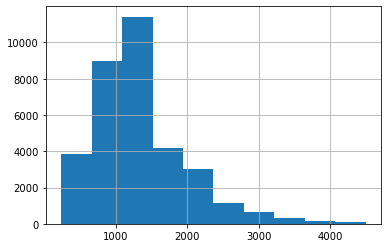

In [42]:
# Distribution
df["Price_Monthly_USD"].hist()

<AxesSubplot:xlabel='Price_Monthly_USD', ylabel='Density'>

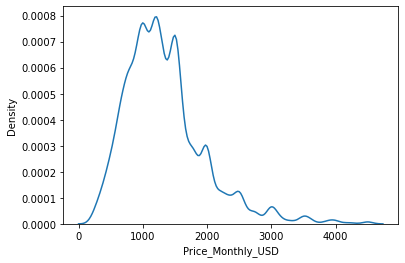

In [46]:
sns.kdeplot(df["Price_Monthly_USD"])

In [47]:
print("Skewness:", df["Price_Monthly_USD"].skew())

Skewness: 1.3180432000551474


#### Transformed (sqrt) Price

In [48]:
df["Price_Sqrt"] = np.sqrt(df["Price_Monthly_USD"])

<AxesSubplot:>

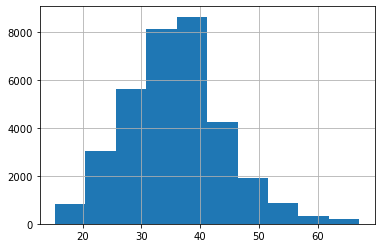

In [49]:
df["Price_Sqrt"].hist()

<AxesSubplot:xlabel='Price_Sqrt', ylabel='Density'>

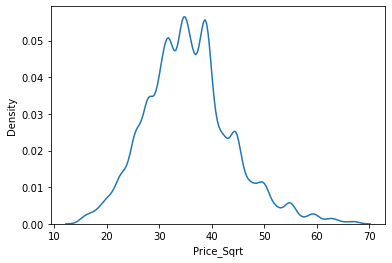

In [50]:
sns.kdeplot(df["Price_Sqrt"])

In [51]:
print("Skewness:", df["Price_Sqrt"].skew())

Skewness: 0.5097099391112635


#### Transformed (log) Price

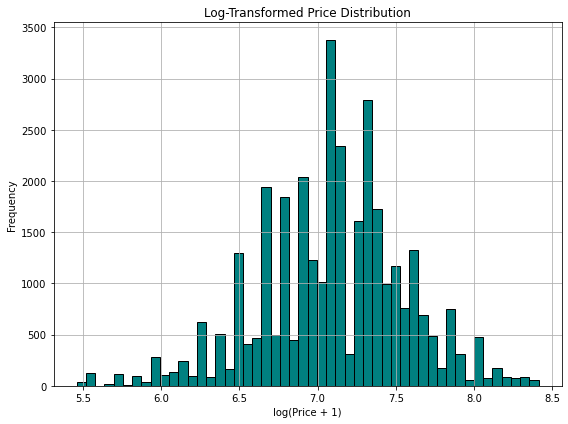

In [52]:
# Apply log transformation to the monthly price
df['Price_Log'] = np.log1p(df['Price_Monthly_USD'])

# Plot the log-transformed price distribution
plt.figure(figsize=(8, 6))
plt.hist(df['Price_Log'].dropna(), bins=50, color='teal', edgecolor='black')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price + 1)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Price_Log', ylabel='Density'>

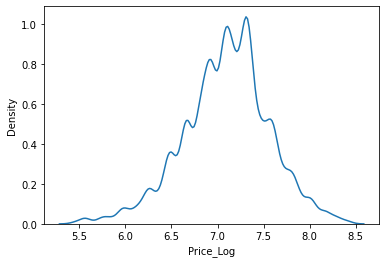

In [53]:
sns.kdeplot(df["Price_Log"])

In [54]:
print("Skewness:", df["Price_Log"].skew())

Skewness: -0.2933650340007323


Finding: The distribution in 'Price_Log' is more normal than others; therefore, we use 'Price_log' as a target variable.

### Age

<AxesSubplot:>

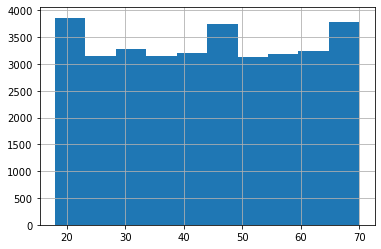

In [55]:
# Distribution
df["Age"].hist()

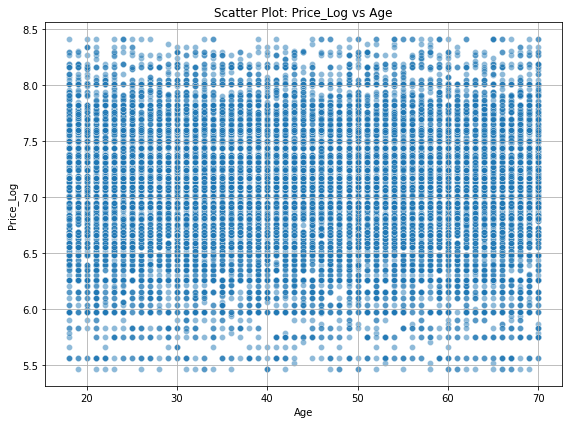

In [56]:
# Filter valid rows
subset = df[['Price_Log', 'Age']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='Age', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Log vs Age")
plt.xlabel("Age")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

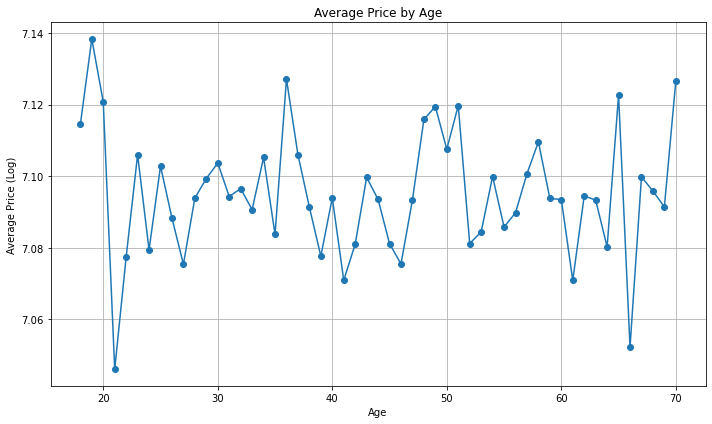

In [57]:
# Calculate the average of each 'floors_in_the_building'
g_dat = df.groupby("Age").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Age"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Age")
plt.xlabel("Age")
plt.ylabel("Average Price (Log)")
plt.grid(True)
plt.tight_layout()
plt.show()

These figures show the relationship between Age and Price. There is no significant correlation for these variables. This indicates that Armenian government might introduce the housing support programme for every citizen, leading to that there is no strong correlational relationship.

### Floors_in_the_building

<AxesSubplot:>

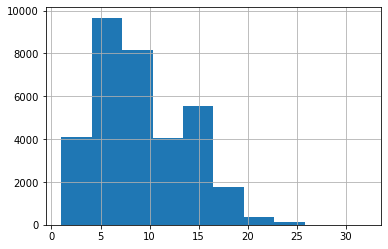

In [58]:
# Distribution
df["Floors_in_the_building"].hist()

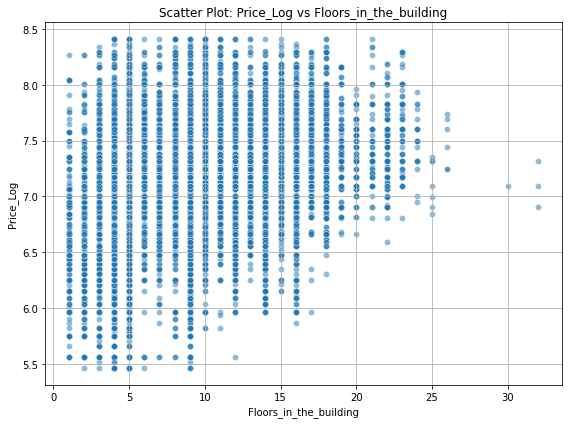

In [59]:
# Filter valid rows
subset = df[['Price_Log', 'Floors_in_the_building']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='Floors_in_the_building', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Log vs Floors_in_the_building")
plt.xlabel("Floors_in_the_building")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

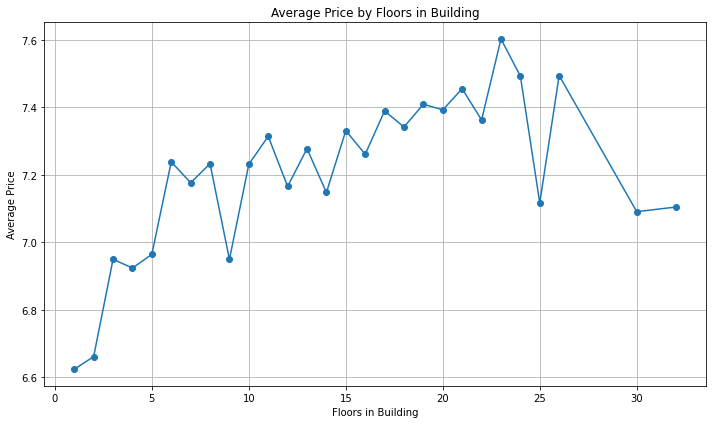

In [60]:
# Calculate the average of each 'floors_in_the_building'
g_dat = df.groupby("Floors_in_the_building").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Floors_in_the_building"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Floors in Building")
plt.xlabel("Floors in Building")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

It seems to be a correlational relationship as long as the floors are from 1 to 23.

### Floor_area

<AxesSubplot:>

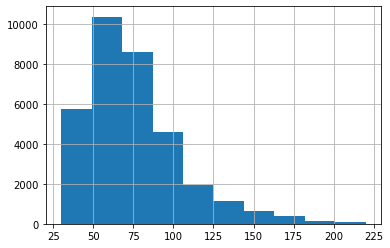

In [61]:
# Distribution
df["Floor_area"].hist()

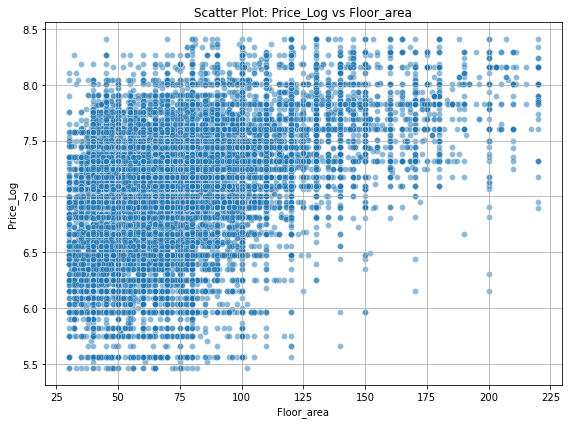

In [62]:
# Filter valid rows
subset = df[['Price_Log', 'Floor_area']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='Floor_area', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Log vs Floor_area")
plt.xlabel("Floor_area")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

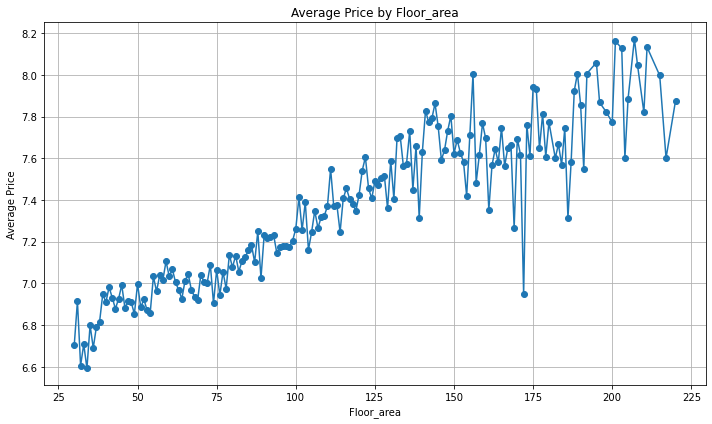

In [63]:
# Calculate the average of each 'Floor_area_Log'
g_dat = df.groupby("Floor_area").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Floor_area"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Floor_area")
plt.xlabel("Floor_area")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

'Floor_area' seems to be a positive factor in increasing price.

### Number_of_rooms

<AxesSubplot:>

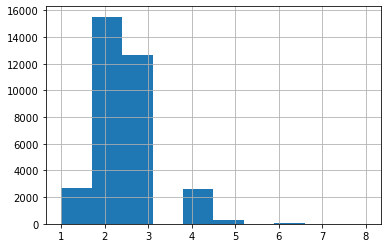

In [64]:
# Distribution
df["Number_of_rooms"].hist()

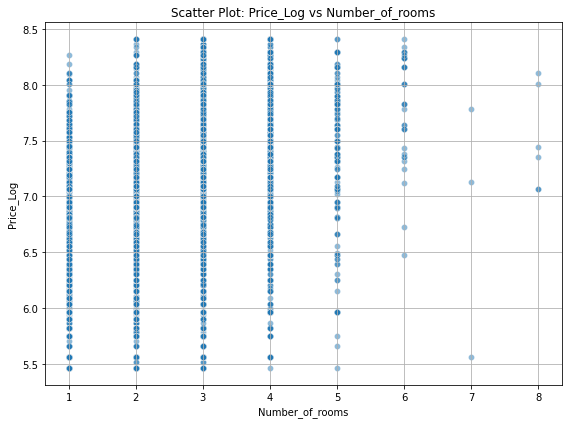

In [65]:
# Filter valid rows
subset = df[['Price_Log', 'Number_of_rooms']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='Number_of_rooms', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Log vs Number_of_rooms")
plt.xlabel("Number_of_rooms")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

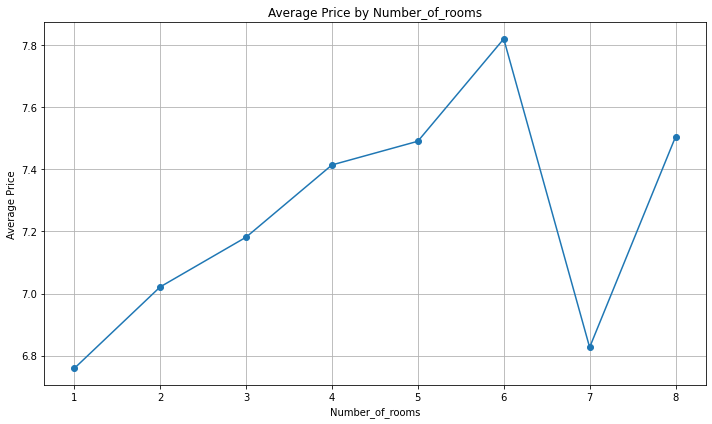

In [66]:
# Calculate the average of each 'Number_of_rooms'
g_dat = df.groupby("Number_of_rooms").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Number_of_rooms"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Number_of_rooms")
plt.xlabel("Number_of_rooms")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

It seems to be a positive factor in increasing price as long as 'Number_of_rooms' are from 1 to 6.

### Number_of_bathrooms

<AxesSubplot:>

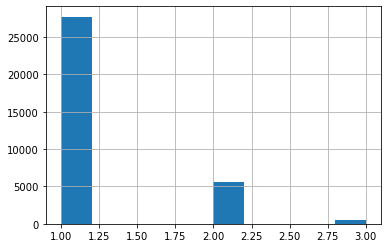

In [67]:
# Distribution
df["Number_of_bathrooms"].hist()

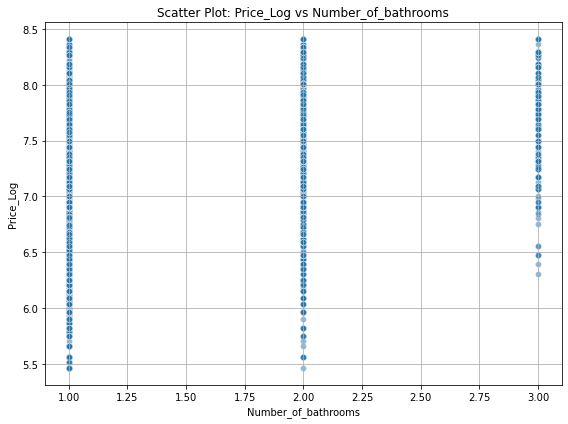

In [68]:
# Filter valid rows
subset = df[['Price_Log', 'Number_of_bathrooms']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='Number_of_bathrooms', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Log vs Number_of_bathrooms")
plt.xlabel("Number_of_bathrooms")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

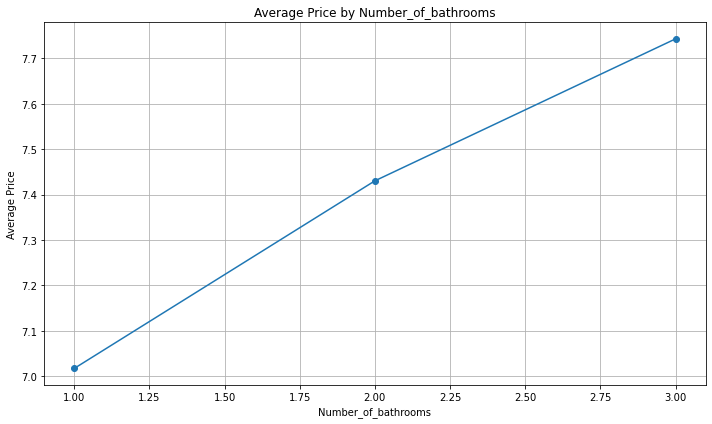

In [69]:
# Calculate the average of each 'Number_of_bathrooms'
g_dat = df.groupby("Number_of_bathrooms").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Number_of_bathrooms"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Number_of_bathrooms")
plt.xlabel("Number_of_bathrooms")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

It seems to be a positive factor in increasing price.

### Ceiling_height

<AxesSubplot:>

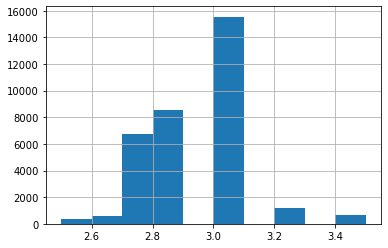

In [70]:
# Distribution
df["Ceiling_height"].hist()

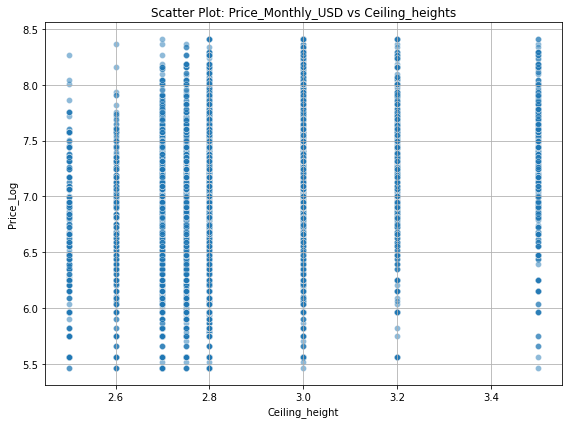

In [71]:
# Filter valid rows
subset = df[['Price_Log', 'Ceiling_height']].dropna()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=subset, x='Ceiling_height', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Monthly_USD vs Ceiling_heights")
plt.xlabel("Ceiling_height")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

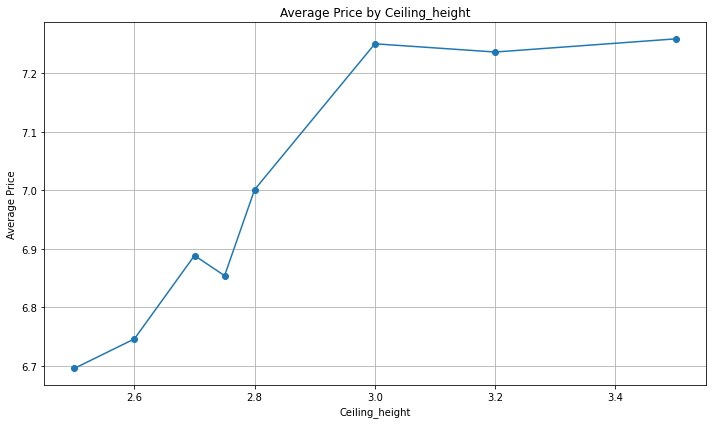

In [72]:
# Calculate the average of each 'Ceiling_height'
g_dat = df.groupby("Ceiling_height").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Ceiling_height"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Ceiling_height")
plt.xlabel("Ceiling_height")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

'Ceiling_height' seems to be a correlational relationship with price until it is 3.

### Floor

<AxesSubplot:>

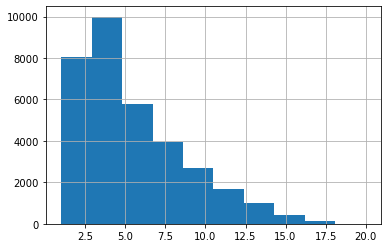

In [73]:
# Distribution(Right skewed)
df["Floor"].hist()

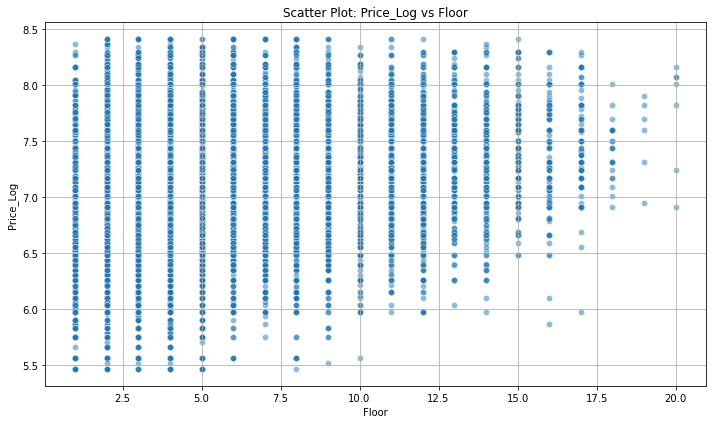

In [74]:
# Filter valid rows
subset = df[['Price_Log', 'Floor']].dropna()

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=subset, x='Floor', y='Price_Log', alpha=0.5)
plt.title("Scatter Plot: Price_Log vs Floor")
plt.xlabel("Floor")
plt.ylabel("Price_Log")
plt.grid(True)
plt.tight_layout()
plt.show()

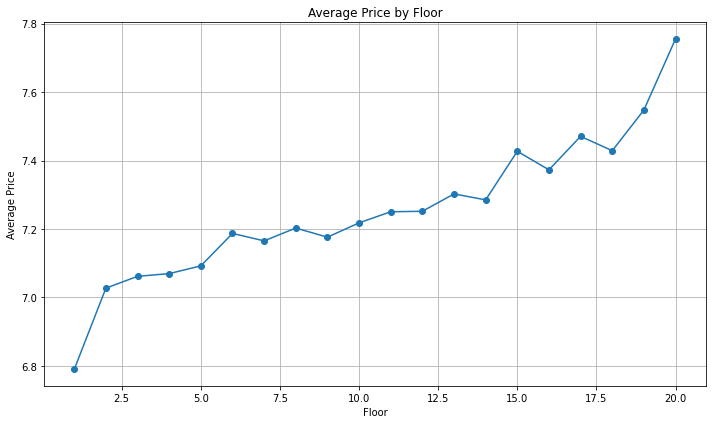

In [75]:
# Calculate the average of each 'Floor'
g_dat = df.groupby("Floor").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Floor"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Floor")
plt.xlabel("Floor")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

'Floor' seems to be a positive factor in increasing price.

## 3-2. Categorical Value<a id="Categorical-values"></a>

### is_yerevan

<AxesSubplot:>

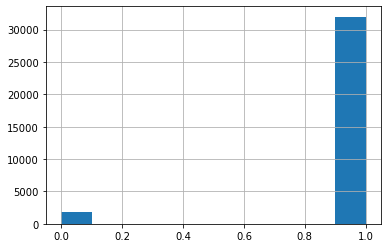

In [76]:
# Distribution
df["is_yerevan"].hist()

<AxesSubplot:xlabel='is_yerevan', ylabel='Price_Log'>

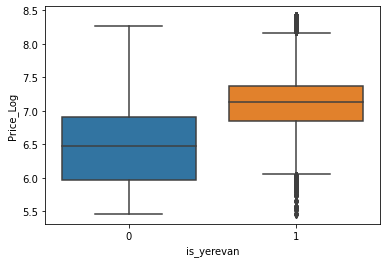

In [77]:
# Relationship (Box plot)
sns.boxplot(x="is_yerevan", y="Price_Log", data=df)

The price in Yerevan is more expensive than in other cities.

### Reg_id

<AxesSubplot:>

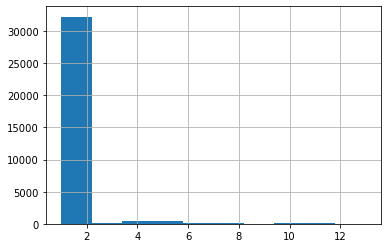

In [78]:
# Distribution (Finding: Reg_id is not unique.)
df["Reg_id"].hist()

<AxesSubplot:xlabel='Reg_id', ylabel='Price_Log'>

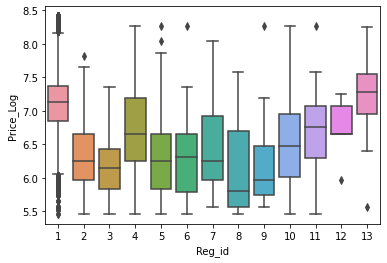

In [79]:
# Relationship (Box plot)
sns.boxplot(x="Reg_id", y="Price_Log", data=df)

Reg_id (1)(13) are the most frequent value. And the price of 1 seem to be the highest.

### Gender

<AxesSubplot:>

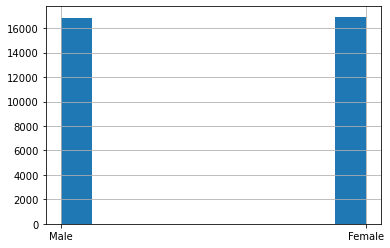

In [80]:
# Distribution
df["Gender"].hist()

<AxesSubplot:xlabel='Gender', ylabel='Price_Log'>

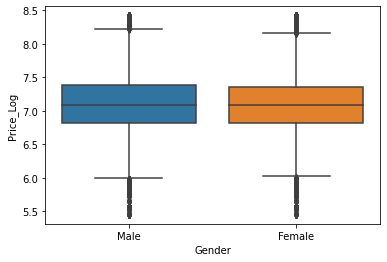

In [81]:
# Relationship (Box plot)
sns.boxplot(x="Gender", y="Price_Log", data=df)

The figure shows the relationship between Gender and Price. There is no significant relationship.

### Construction_type

<AxesSubplot:>

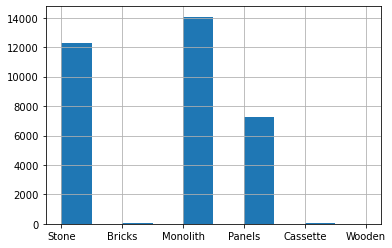

In [82]:
# Distribution
df["Construction_type"].hist()

<AxesSubplot:xlabel='Construction_type', ylabel='Price_Log'>

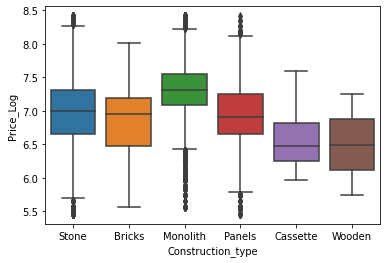

In [83]:
# Relationship (Box plot)
sns.boxplot(x="Construction_type", y="Price_Log", data=df)

The figure shows the relationship between Construction_type and Price. Monolish might be a positive factor in increasing price. On the other hand, Cassette might be a negative factor in increasing price.

### New_construction

<AxesSubplot:>

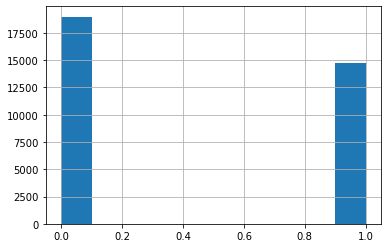

In [84]:
# Distribution
df["New_construction"].hist()

<AxesSubplot:xlabel='New_construction', ylabel='Price_Log'>

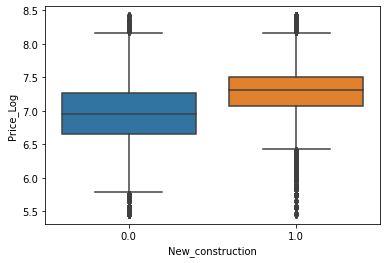

In [85]:
# Relationship (Box plot)
sns.boxplot(x="New_construction", y="Price_Log", data=df)

The figure shows the relationship between New_construction and Price. New one might be a positive factor in increasing price.

### Elevator

<AxesSubplot:>

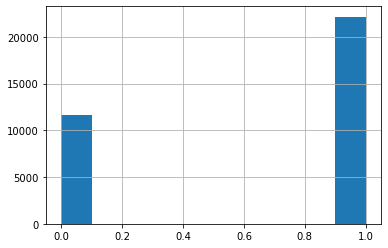

In [86]:
# Distribution
df["Elevator"].hist()

<AxesSubplot:xlabel='Elevator', ylabel='Price_Log'>

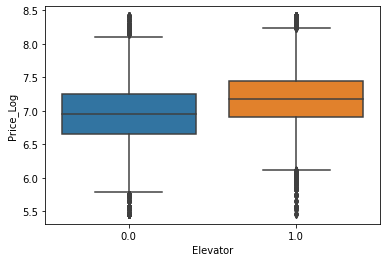

In [87]:
# Relationship (Box plot)
sns.boxplot(x="Elevator", y="Price_Log", data=df)

The figure shows the relationship between Elevator and Price. Having an elevator might be a positive factor in increasing price.

### Balcony

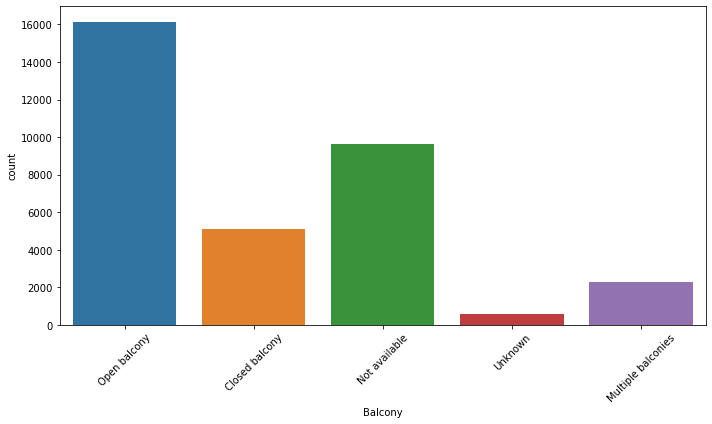

In [88]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Balcony", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

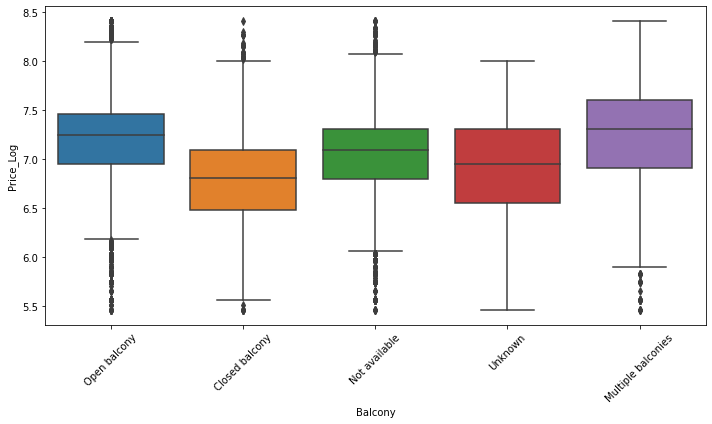

In [89]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Balcony", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

Having a balcony (specifically, Open balcony or Multiple balconies) seems to be a positive factor in increasing price.

### Furniture

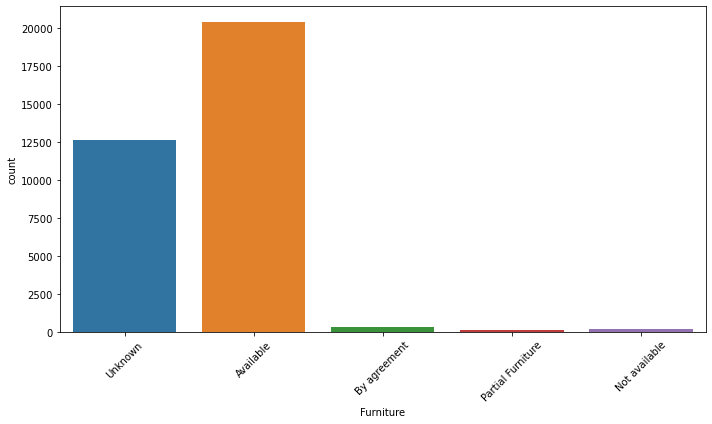

In [90]:
# Distribution (Available seems to be common.)
plt.figure(figsize=(10, 6))
sns.countplot(x="Furniture", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

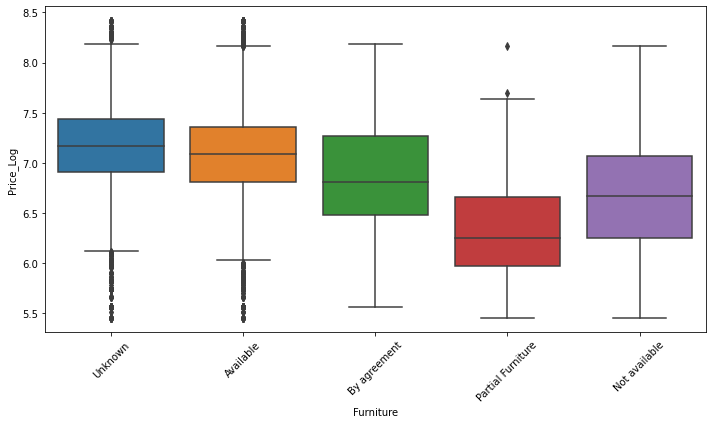

In [91]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Furniture", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

There are many Unknown.

### Renovation

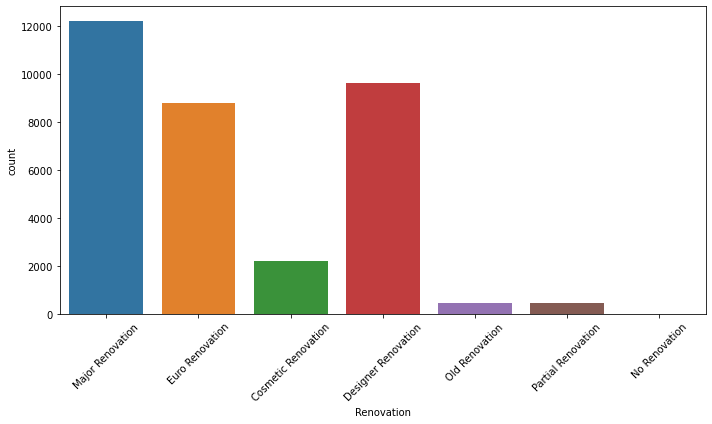

In [92]:
# Distribution 
plt.figure(figsize=(10, 6))
sns.countplot(x="Renovation", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

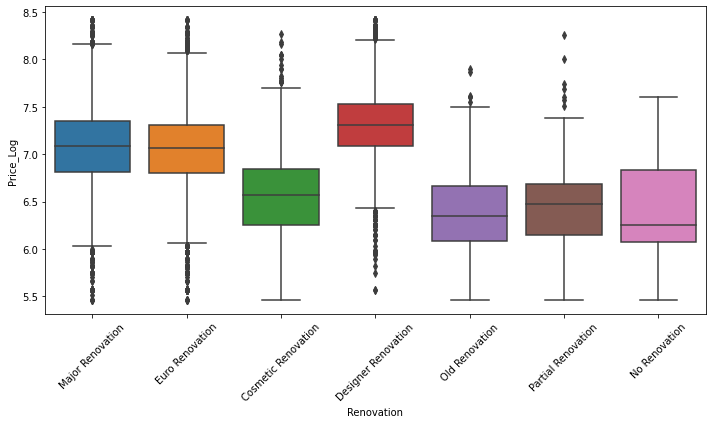

In [93]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Renovation", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

It seems to be a difference between the renovation types. In particular, Designer Renovation, Major Renovation, and Euro Renovation might have an influence on increasing price.

### Children_are_welcome

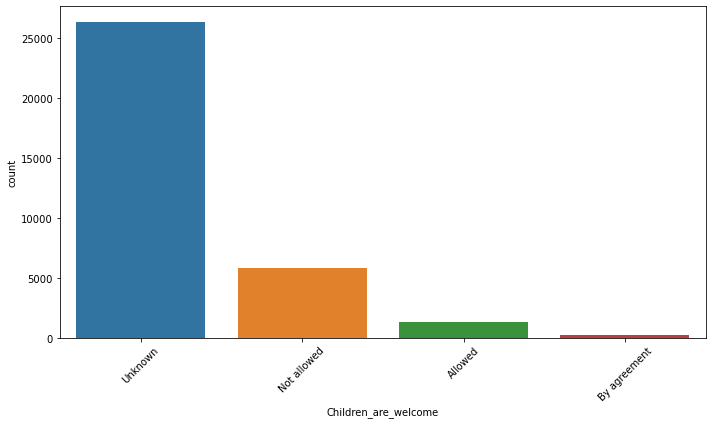

In [94]:
# Distribution (Many Unknown)
plt.figure(figsize=(10, 6))
sns.countplot(x="Children_are_welcome", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

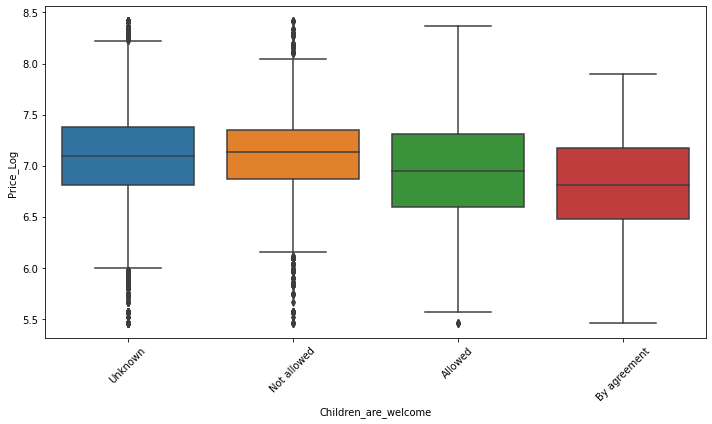

In [95]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Children_are_welcome", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

There are many Unknown.

### Pets_allowed

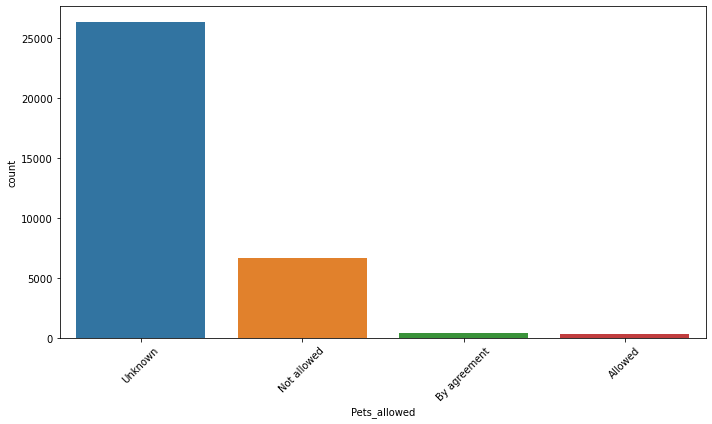

In [96]:
# Distribution (Many Unknown)
plt.figure(figsize=(10, 6))
sns.countplot(x="Pets_allowed", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

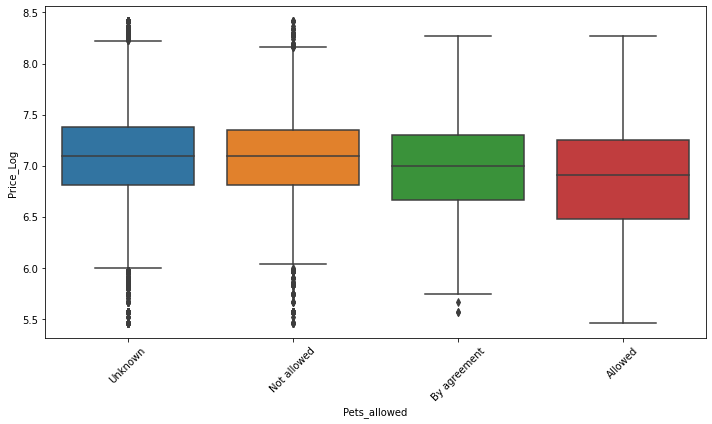

In [97]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pets_allowed", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

There are many Unknown.

### Utility_payments

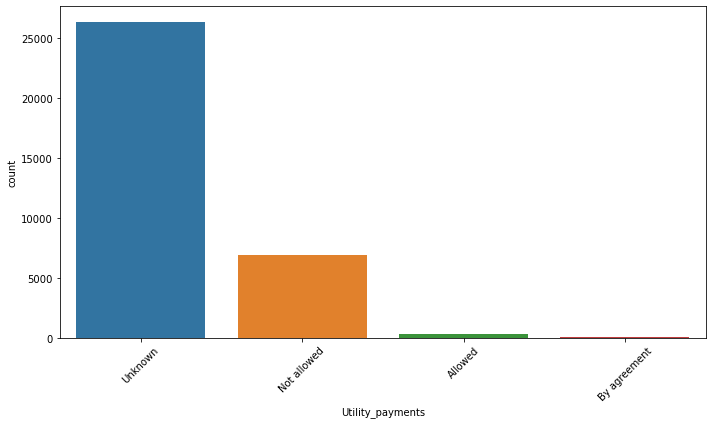

In [98]:
# Distribution (Many Unknown)
plt.figure(figsize=(10, 6))
sns.countplot(x="Utility_payments", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

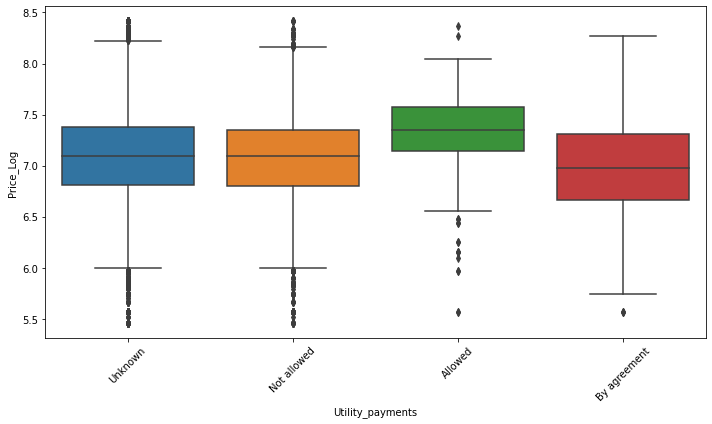

In [99]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Utility_payments", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

There are many Unknown.

### Currency

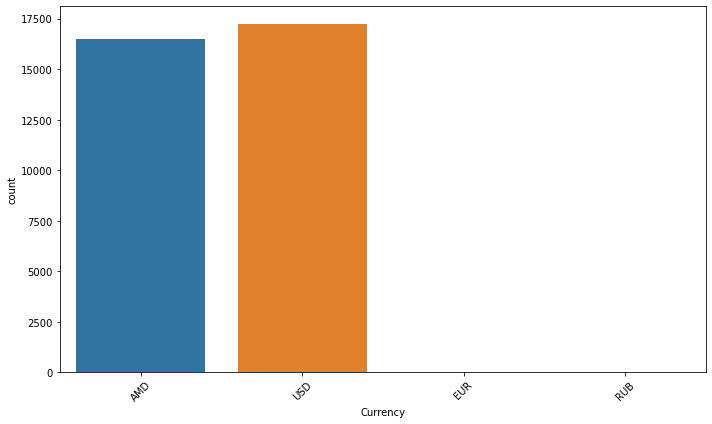

In [100]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Currency", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

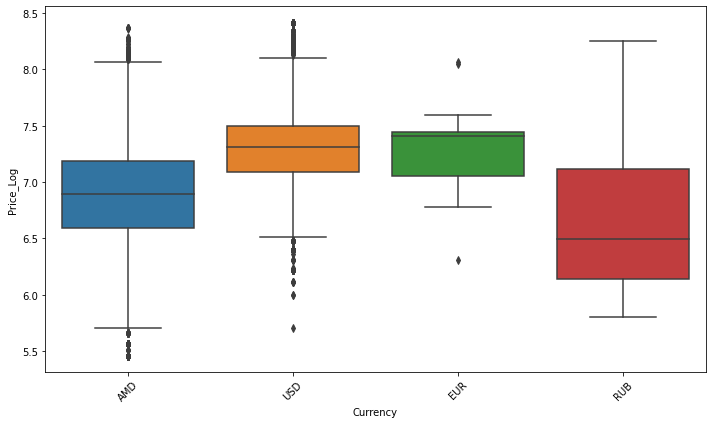

In [101]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Currency", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

AMD might be a negative factor in increasing price, while USD might be a positive factor in increasing price. However, it does not make sense.

### Duration

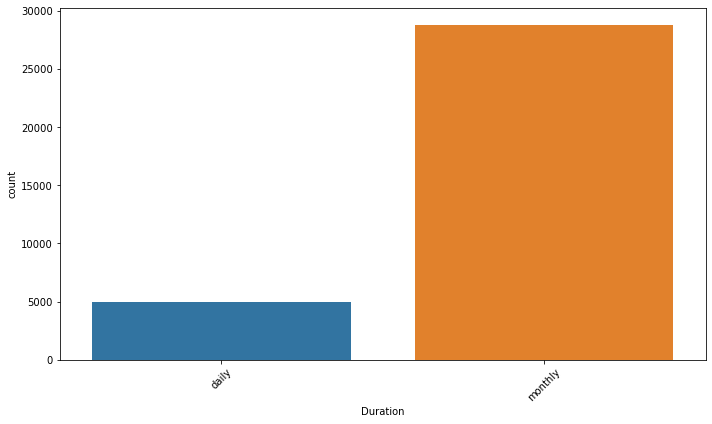

In [102]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Duration", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

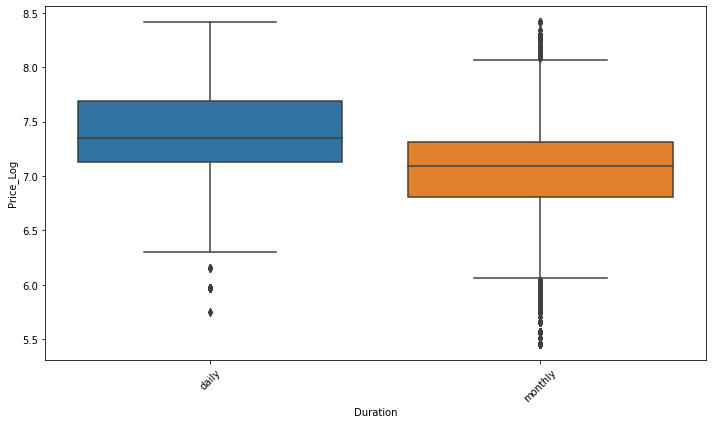

In [103]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Duration", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

### Datetime

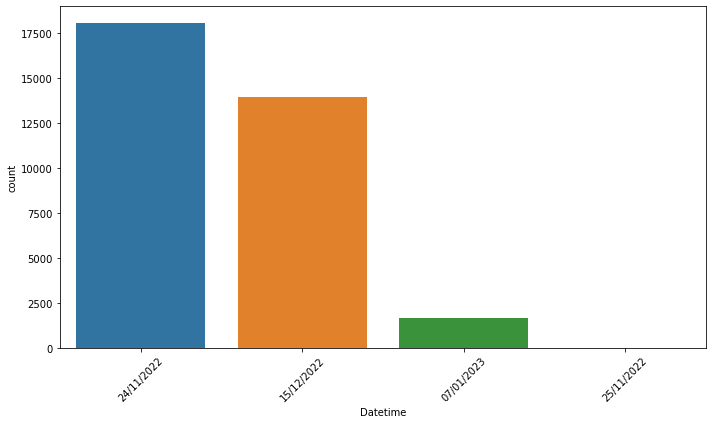

In [104]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Datetime", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

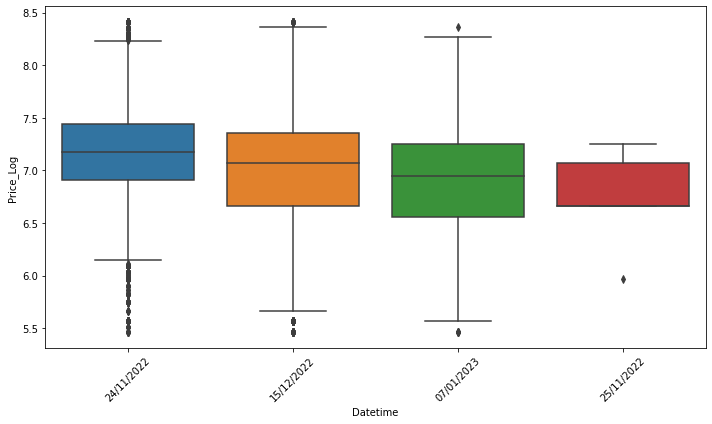

In [105]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Datetime", y="Price_Log", data=df)
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

People might tend to live in a new place on the new year's day. To do so, most of them might look for new flat in advance (i.e., November), resulting in high demand and high price.

### amenity_ (0: Does not have amenities, 1: Have amenities)

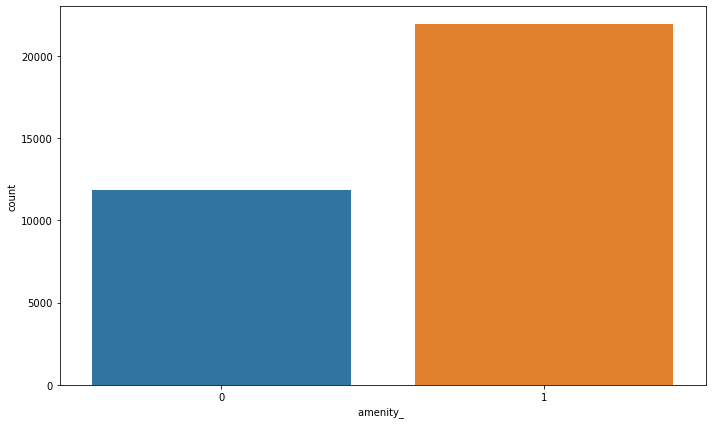

In [106]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="amenity_ ", data=df)
plt.tight_layout() 
plt.show()

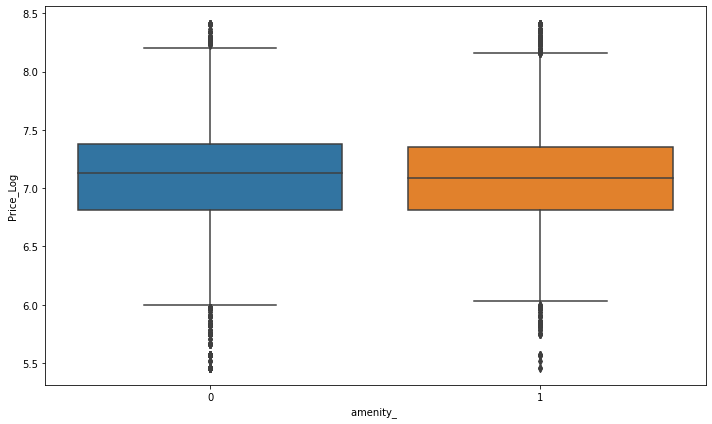

In [107]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="amenity_ ", y="Price_Log", data=df)
plt.tight_layout() 
plt.show()

There is no significant difference either having amanities or not.

### parking_ (0: Does not have parking, 1: Have parking)

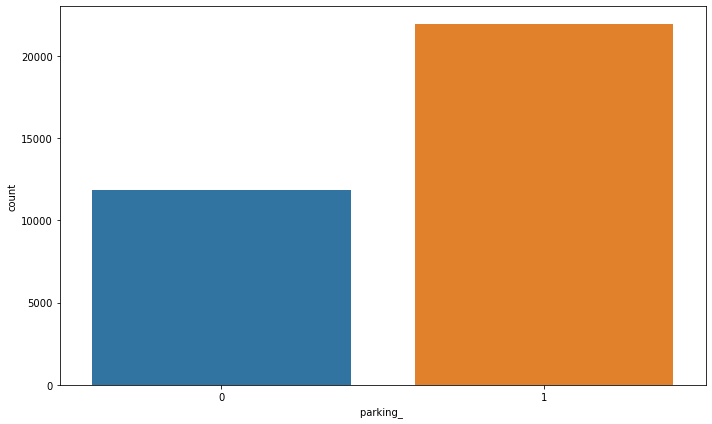

In [108]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="parking_ ", data=df)
plt.tight_layout() 
plt.show()

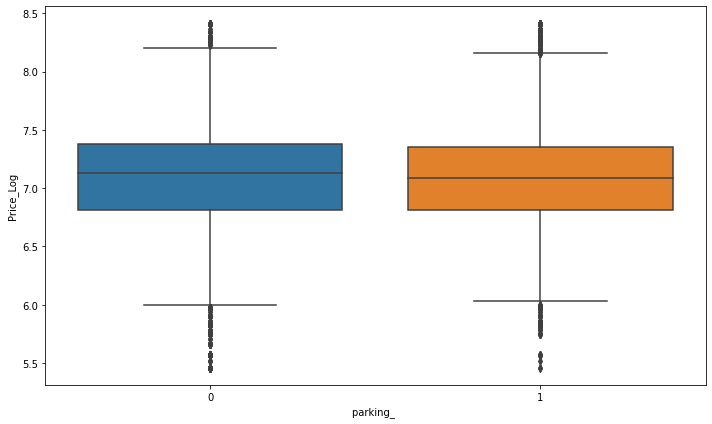

In [109]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="parking_ ", y="Price_Log", data=df)
plt.tight_layout() 
plt.show()

There is no significant difference either having a parking or not.

In [110]:
# Output the csv file
df.to_csv("cleaned_df_v0.6.csv", index=False)

# 4. Feature Engineering (Distance from each city to the city centre)<a id="Feature-Engineering"></a>

## Distance from each city to the city centre (Northern avenue) in Yerevan: km

In [3]:
# Load the correct available file
df = pd.read_csv("cleaned_df_v0.6.csv")

# Define city/street and their coordinates
location_data = {
    "Saryan": (40.184658, 44.505948),
    "Abovyan": (40.185443128492054, 44.52081993322054),
    "Northern avenue": (40.181341715629415, 44.51460612154347),
    "Yeznik Koghbatsi street": (40.182021107978024, 44.51132604063344),
    "Sayat Nova Ave": (40.18223400427301, 44.52099098480976),
    "Tumanyan St": (40.18304093515094, 44.516651367621705),
    "Aram Street": (40.179788077476985, 44.51333983166694),
    "Argishti St": (40.17404776941879, 44.50326755253668),
    "Mesrop Mashtots": (40.183303354998856, 44.51056478637547),
    "Amiryan St": (40.18072893218969, 44.50817809645698),
    "Komitas Ave": (40.20538689924389, 44.50488513890926),
    "Nikoghayos Adonts Street": (40.212608306598554, 44.52301641179938),
    "Vardanants Street": (40.17471998548904, 44.52152906410329),
    "Verin Antarayin Street": (40.1947091112475, 44.51024418013915),
    "Nalbandyan Street": (40.182309366451925, 44.52016650963881),
    "Marshal Baghramyan Avenue": (40.192392787330675, 44.50419788296332),
    "Pushkin Street": (40.18307626926649, 44.51244418296283),
    "Byuzand Street": (40.1767120182835, 44.51676526946842),
    "Gyumri": (40.784153272976745, 43.83583971895822),
    "Vanadzor": (40.80707899160467, 44.49861661129716),
    "Vagharshapat": (40.155964328534445, 44.299566537704905),
    "Hrazdan": (40.54040261850281, 44.7643012717667),
    "Kapan": (39.208688860853826, 46.40857498110673),
    "Abovyan": (40.26057378743978, 44.635312060603546),
    "Armavir": (40.15741690997189, 44.035002162191326),
    "Charentsavan": (40.40213105487305, 44.64214953418129),
    "Masis": (40.06041652201695, 44.44994162451155),
}

city_centre_coords = location_data["Northern avenue"]

# Prepare lists for new columns
location_group_list = []
latitude_list = []
longitude_list = []
distance_list = []

# Iterate over DataFrame and assign location groups
for idx, row in df.iterrows():
    location_group = None
    lat, lon = None, None

    for name, coords in location_data.items():
        if name in str(row["Address"]):
            location_group = name
            lat, lon = coords
            break

    for city in ["Gyumri", "Vanadzor", "Vagharshapat", "Hrazdan", "Kapan", "Abovyan", "Armavir", "Charentsavan", "Masis"]:
        if row.get(f"city_{city}", 0) == 1:
            location_group = city
            lat, lon = location_data[city]
            break

    location_group_list.append(location_group)
    latitude_list.append(lat)
    longitude_list.append(lon)

    if lat is not None and lon is not None:
        distance = geodesic(city_centre_coords, (lat, lon)).km
    else:
        distance = None
    distance_list.append(distance)

# Add columns
df["Location_group"] = location_group_list
df["latitude"] = latitude_list
df["longitude"] = longitude_list
df["Distance_to_city_centre_km"] = distance_list

# Drop Yerevan rows without matching streets
df = df[~((df["city_Yerevan"] == 1) & (df["Location_group"].isna()))]

# Save the result
output_path_069 = "cleaned_df_v0.69.csv"
df.to_csv(output_path_069, index=False)

In [4]:
# Read the csv file
df = pd.read_csv("cleaned_df_v0.69.csv")
df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Currency_original,Duration_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan,city_group,Price_Sqrt,Price_Log,Location_group,latitude,longitude,Distance_to_city_centre_km
0,3,Male,60,Stone,0.0,0.0,5.0,41.0,2.0,1.0,2.7,5.0,Open balcony,Unknown,Major Renovation,Unknown,Unknown,Unknown,Ararat › Artashat,20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities,39.496835,7.353082,NaN,NaN,NaN,NaN
1,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,Unknown,Euro Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,270000.0,AMD,monthly,702.0,702.0,23.400000,0,0,Other_Cities,26.495283,6.555357,Vagharshapat,40.155964,44.299567,18.533267
2,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,160000.0,AMD,monthly,416.0,416.0,13.866667,0,0,Other_Cities,20.396078,6.033086,Vagharshapat,40.155964,44.299567,18.533267
3,4,Female,43,Stone,1.0,1.0,12.0,40.0,1.0,1.0,2.5,9.0,Open balcony,Unknown,Euro Renovation,Not allowed,Not allowed,Not allowed,"Antarayin 1st blok 10, Tsaghkadzor",20000.0,AMD,daily,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20000.0,AMD,daily,52.0,1560.0,52.000000,0,0,Other_Cities,39.496835,7.353082,NaN,NaN,NaN,NaN
4,5,Female,61,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,Unknown,Cosmetic Renovation,Unknown,Unknown,Unknown,"13th street, Gyumri",200000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,200000.0,AMD,monthly,520.0,520.0,17.333333,0,0,Other_Cities,22.803509,6.255750,Gyumri,40.784153,43.835840,88.277508


In [5]:
# Remove rows with NaN in Location_group
df_cleaned = df.dropna(subset=["Location_group"])

# Save the cleaned DataFrame
cleaned_path = "cleaned_df_v0.7.csv"
df_cleaned.to_csv(cleaned_path, index=False)

In [4]:
df = pd.read_csv("cleaned_df_v0.7.csv")
df.head()

,Reg_id,Gender,Age,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,Furniture,Renovation,Children_are_welcome,Pets_allowed,Utility_payments,Address,Price,Currency,Duration,Datetime,amenities,appliances,parking,data_source,amenity_,amenity_air_conditioner,amenity_internet,amenity_parking_space,amenity_television,appliance_,appliance_coffee_maker,appliance_dishwasher,appliance_drying_machine,appliance_hair_dryer,appliance_iron,appliance_microwave,appliance_stove,appliance_washing_machine,appliance_water_heater,appliance_fridge,parking_,parking_covered_parking,parking_garage,parking_outdoor_parking,city_Yerevan,city_Gyumri,city_Vanadzor,city_Vagharshapat,city_Hrazdan,city_Kapan,city_Abovyan,city_Armavir,city_Charentsavan,city_Masis,city_other,Price_original,Currency_original,Duration_original,Price_USD,Price_Monthly_USD,Price_Daily_USD,price_is_extreme,is_yerevan,city_group,Price_Sqrt,Price_Log,Location_group,latitude,longitude,Distance_to_city_centre_km
0,2,Female,51,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,Unknown,Euro Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,270000.0,AMD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,270000.0,AMD,monthly,702.0,702.0,23.400000,0,0,Other_Cities,26.495283,6.555357,Vagharshapat,40.155964,44.299567,18.533267
1,2,Male,20,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,Available,Major Renovation,Unknown,Unknown,Unknown,Armavir › Echmiadzin,160000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,160000.0,AMD,monthly,416.0,416.0,13.866667,0,0,Other_Cities,20.396078,6.033086,Vagharshapat,40.155964,44.299567,18.533267
2,5,Female,61,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,Unknown,Cosmetic Renovation,Unknown,Unknown,Unknown,"13th street, Gyumri",200000.0,AMD,monthly,15/12/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,200000.0,AMD,monthly,520.0,520.0,17.333333,0,0,Other_Cities,22.803509,6.255750,Gyumri,40.784153,43.835840,88.277508
3,1,Male,52,Monolith,1.0,1.0,18.0,55.0,2.0,1.0,3.0,16.0,Open balcony,Unknown,Designer Renovation,Unknown,Unknown,Unknown,"Aram Street 107, Yerevan",1000.0,USD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1000.0,USD,monthly,1000.0,1000.0,33.333333,0,1,Yerevan,31.622777,6.908755,Aram Street,40.179788,44.513340,0.203450
4,1,Male,18,Monolith,1.0,1.0,16.0,96.0,3.0,2.0,3.0,9.0,Open balcony,Unknown,Designer Renovation,Not allowed,Not allowed,Not allowed,"Aram Street, Yerevan",2200.0,USD,monthly,24/11/2022,NaN,NaN,NaN,train,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2200.0,USD,monthly,2200.0,2200.0,73.333333,0,1,Yerevan,46.904158,7.696667,Aram Street,40.179788,44.513340,0.203450


In [7]:
df.shape

(8181, 73)

<AxesSubplot:>

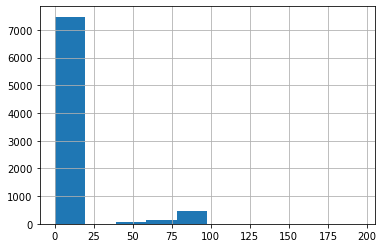

In [12]:
# Distribution
df["Distance_to_city_centre_km"].hist()

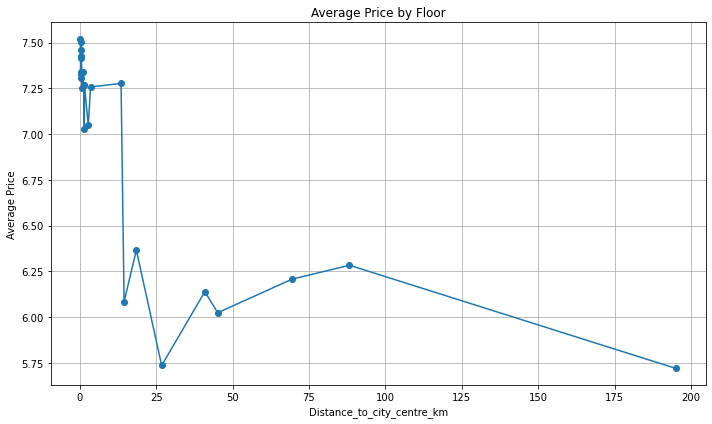

In [13]:
# Calculate the average of each 'Floor'
g_dat = df.groupby("Distance_to_city_centre_km").agg({"Price_Log": "mean"}).reset_index(drop=False)

# Visualise the relationship
plt.figure(figsize=(10, 6))
plt.plot(g_dat["Distance_to_city_centre_km"], g_dat["Price_Log"], marker='o')
plt.title("Average Price by Floor")
plt.xlabel("Distance_to_city_centre_km")
plt.ylabel("Average Price")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Finalise a CSV file<a id="Finalise-a-CSV"></a>

In [1]:
# Load the original dataset
df = pd.read_csv("cleaned_df_v0.7.csv")

# Define the columns to retain
columns_to_keep = [
    "Construction_type", "New_construction", "Elevator", "Floors_in_the_building",
    "Floor_area", "Number_of_rooms", "Number_of_bathrooms", "Ceiling_height", "Floor",
    "Balcony", "Renovation", "Address", "Price", "Currency", "Duration", "Datetime",
    "Price_Monthly_USD", "is_yerevan", "Location_group", "latitude", "longitude",
    "Distance_to_city_centre_km", "Price_Log"
]

# Subset the DataFrame to include only the desired columns
df_selected = df[columns_to_keep]

# Save the filtered DataFrame to a new CSV file
df_selected.to_csv("cleaned_df_v1.0.csv", index=False)

print("New dataset saved as 'cleaned_df_v1.0.csv' with selected columns.")

New dataset saved as 'cleaned_df_v1.0.csv' with selected columns.


In [3]:
df = pd.read_csv("cleaned_df_v1.0.csv")
df

,Construction_type,New_construction,Elevator,Floors_in_the_building,Floor_area,Number_of_rooms,Number_of_bathrooms,Ceiling_height,Floor,Balcony,...,Currency,Duration,Datetime,Price_Monthly_USD,is_yerevan,Location_group,latitude,longitude,Distance_to_city_centre_km,Price_Log
0,Stone,0.0,0.0,5.0,76.0,4.0,1.0,2.7,4.0,Open balcony,...,AMD,monthly,24/11/2022,702.0,0,Vagharshapat,40.155964,44.299567,18.533267,6.555357
1,Stone,0.0,0.0,5.0,78.0,3.0,1.0,2.7,3.0,Closed balcony,...,AMD,monthly,15/12/2022,416.0,0,Vagharshapat,40.155964,44.299567,18.533267,6.033086
2,Bricks,0.0,0.0,4.0,100.0,3.0,1.0,2.6,3.0,Open balcony,...,AMD,monthly,15/12/2022,520.0,0,Gyumri,40.784153,43.835840,88.277508,6.255750
3,Monolith,1.0,1.0,18.0,55.0,2.0,1.0,3.0,16.0,Open balcony,...,USD,monthly,24/11/2022,1000.0,1,Aram Street,40.179788,44.513340,0.203450,6.908755
4,Monolith,1.0,1.0,16.0,96.0,3.0,2.0,3.0,9.0,Open balcony,...,USD,monthly,24/11/2022,2200.0,1,Aram Street,40.179788,44.513340,0.203450,7.696667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8176,Stone,0.0,1.0,11.0,45.0,2.0,1.0,3.0,8.0,Not available,...,USD,monthly,24/11/2022,1300.0,1,Yeznik Koghbatsi street,40.182021,44.511326,0.289362,7.170888
8177,Panels,0.0,1.0,9.0,86.0,3.0,1.0,3.0,5.0,Not available,...,USD,monthly,24/11/2022,1200.0,1,Komitas Ave,40.205387,44.504885,2.795311,7.090910
8178,Stone,0.0,0.0,4.0,61.0,3.0,1.0,3.0,3.0,Open balcony,...,USD,monthly,24/11/2022,1000.0,1,Komitas Ave,40.205387,44.504885,2.795311,6.908755
8179,Monolith,1.0,1.0,11.0,85.0,3.0,1.0,3.0,8.0,Not available,...,USD,monthly,24/11/2022,2000.0,1,Amiryan St,40.180729,44.508178,0.551674,7.601402


# 6. Task 1<a id="Task-1"></a> 

## 6-1. Task (a) Data understanding: Attributes of high-priced properties (Discrete variables)<a id="Task-1a"></a>

### Discrete Variable 1: Elevator

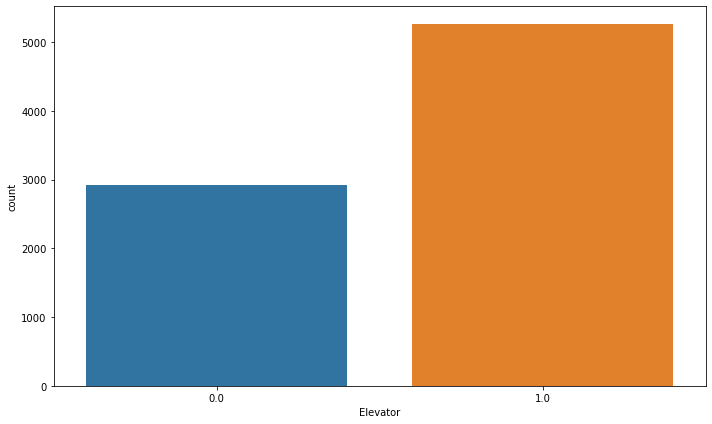

In [5]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="Elevator", data=df)
plt.tight_layout() 
plt.show()

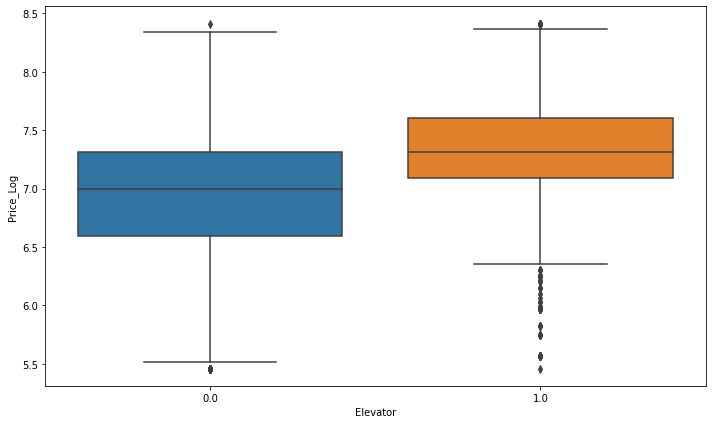

In [6]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="Elevator", y="Price_Log", data=df)
plt.tight_layout() 
plt.show()

In [7]:
# Grouping: with and without elevator
group1 = df[df['Elevator'] == 1]['Price_Log']
group2 = df[df['Elevator'] == 0]['Price_Log']

# Levene’s test to assess equal variances
levene_stat, levene_p = levene(group1, group2)
equal_var = levene_p >= 0.05
print(f"Levene’s test for Elevator: stat = {levene_stat:.4f}, p-value = {levene_p:.4f}")
print("→ Using equal_var =", equal_var)

# Welch’s t-test (or standard t-test based on Levene)
t_stat, p_val = ttest_ind(group1, group2, equal_var=equal_var) # 'equal_var=False' means Welch's t-test
print(f"T-test for Elevator: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis — price differs significantly based on the presence of an elevator.")
else:
    print("Conclusion: Cannot reject the null hypothesis — price difference related to elevator is not statistically significant.")

Levene’s test for Elevator: stat = 499.3027, p-value = 0.0000
→ Using equal_var = False
T-test for Elevator: t-stat = 36.4388, p-value = 0.0000
Conclusion: Reject the null hypothesis — price differs significantly based on the presence of an elevator.


### Discrete Variable 2: New_construction

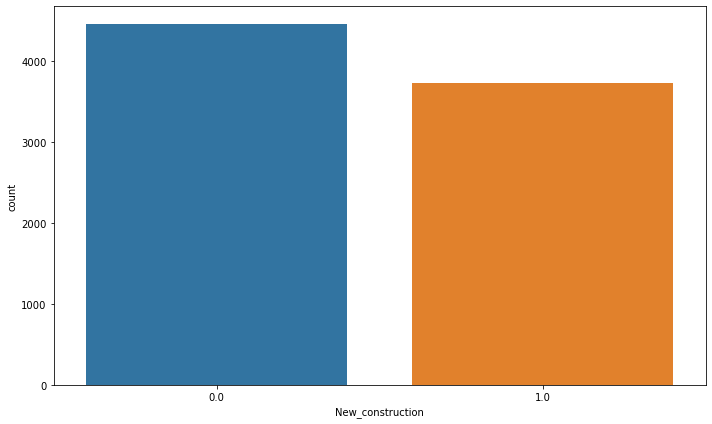

In [8]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="New_construction", data=df)
plt.tight_layout() 
plt.show()

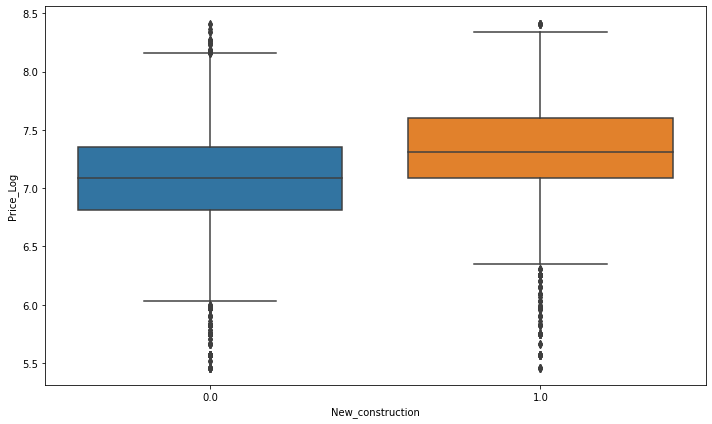

In [9]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="New_construction", y="Price_Log", data=df)
plt.tight_layout() 
plt.show()

In [11]:
# Grouping: new construction vs older buildings
group1 = df[df['New_construction'] == 1]['Price_Log']
group2 = df[df['New_construction'] == 0]['Price_Log']

# Levene’s test
levene_stat, levene_p = levene(group1, group2)
equal_var = levene_p >= 0.05
print(f"Levene’s test for New_construction: stat = {levene_stat:.4f}, p-value = {levene_p:.4f}")
print("→ Using equal_var =", equal_var)

# T-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=equal_var) #'equal_var=False' means Welch's t-test
print(f"T-test for New_construction: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis — new construction significantly affects price.")
else:
    print("Conclusion: Cannot reject the null hypothesis — the effect of construction status is not statistically significant.")


Levene’s test for New_construction: stat = 44.9502, p-value = 0.0000
→ Using equal_var = False
T-test for New_construction: t-stat = 26.1573, p-value = 0.0000
Conclusion: Reject the null hypothesis — new construction significantly affects price.


### Discrete Variable 3: is_yerevan

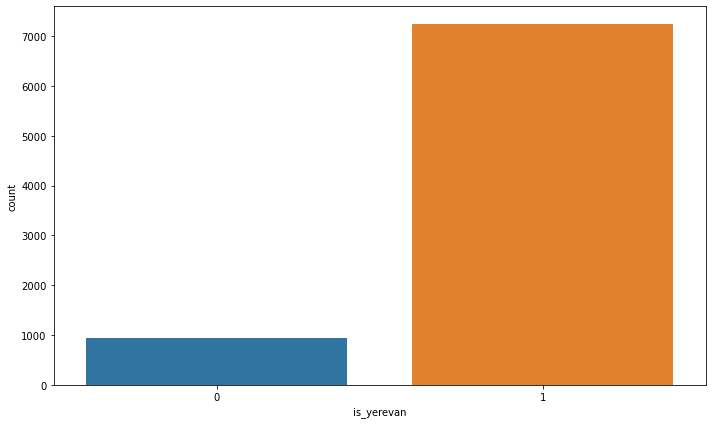

In [12]:
# Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="is_yerevan", data=df)
plt.tight_layout() 
plt.show()

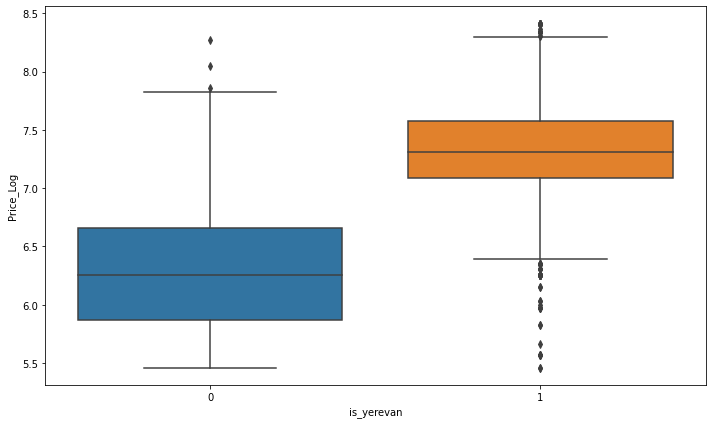

In [13]:
# Relationship (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x="is_yerevan", y="Price_Log", data=df)
plt.tight_layout() 
plt.show()

In [14]:
# Grouping: properties in Yerevan vs outside
group1 = df[df['is_yerevan'] == 1]['Price_Log']
group2 = df[df['is_yerevan'] == 0]['Price_Log']

# Levene’s test
levene_stat, levene_p = levene(group1, group2)
equal_var = levene_p >= 0.05
print(f"Levene’s test for is_yerevan: stat = {levene_stat:.4f}, p-value = {levene_p:.4f}")
print("→ Using equal_var =", equal_var)

# T-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=equal_var) #'equal_var=False' means Welch's t-test
print(f"T-test for is_yerevan: t-stat = {t_stat:.4f}, p-value = {p_val:.4f}")

# Conclusion
if p_val < 0.05:
    print("Conclusion: Reject the null hypothesis — significant price difference exists between Yerevan and other regions.")
else:
    print("Conclusion: Cannot reject the null hypothesis — no statistically significant difference based on location.")

Levene’s test for is_yerevan: stat = 204.9234, p-value = 0.0000
→ Using equal_var = False
T-test for is_yerevan: t-stat = 59.8765, p-value = 0.0000
Conclusion: Reject the null hypothesis — significant price difference exists between Yerevan and other regions.


## 6-2. Task (b) Data understanding: Correlation<a id="Task-1b"></a>

### Numerical vs Numerical (Number_of_rooms vs Price_Log)

In [15]:
x = df['Number_of_rooms']
y = df['Price_Log']

pearsonr(x, y) # output: (correlational value, p value)

(0.29211651636290664, 1.1650970722446665e-160)

### Categorical vs Numerical Attribute

#### Duration(Categorical) vs Price_Log(Numerical)

In [16]:
# Grouping
group1 = df[df['Duration'] == 'monthly']['Price_Log']
group2 = df[df['Duration'] == 'daily']['Price_Log']

# Step 1: Levene's Test for Equal Variance
levene_stat, levene_p = levene(group1, group2)
print(f"Levene’s test: stat = {levene_stat:.4f}, p-value = {levene_p:.4f}")

# Choose t-test type based on Levene's test
equal_var = levene_p >= 0.05

# Step 2: T-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=equal_var) # 'equal_var=False' means Welch's t-test
print(f"T-stat: {t_stat:.4f}, p-value: {p_val:.4f}")

# Step 3: Conclusion
a = 0.05
if p_val < a:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Cannot reject the null hypothesis (no significant difference).")


Levene’s test: stat = 4.7581, p-value = 0.0292
T-stat: -27.1949, p-value: 0.0000
Result: Reject the null hypothesis (significant difference).


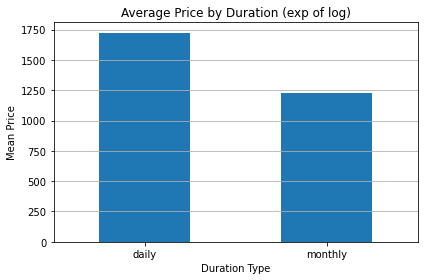

In [17]:
# Average (Price i.e., exponential of log)
price_means = df.groupby('Duration')['Price_Log'].mean().apply(np.exp)

# Graph
price_means.plot(kind='bar')
plt.title('Average Price by Duration (exp of log)')
plt.ylabel('Mean Price')
plt.xlabel('Duration Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Duration(Categorical) vs Number_of_rooms(Numerical)

In [18]:
df["Number_of_rooms_Sqrt"] = np.sqrt(df["Number_of_rooms"])

<AxesSubplot:>

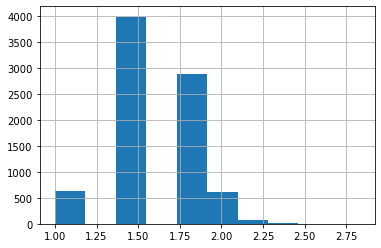

In [19]:
df["Number_of_rooms_Sqrt"].hist()

In [20]:
# Grouping
group1 = df[df['Duration'] == 'monthly']['Number_of_rooms_Sqrt']
group2 = df[df['Duration'] == 'daily']['Number_of_rooms_Sqrt']

# Step 1: Levene's Test for Equal Variance
levene_stat, levene_p = levene(group1, group2)
equal_var = levene_p >= 0.05  #　False: Welch

print(f"Levene’s test: stat = {levene_stat:.4f}, p-value = {levene_p:.4f}")
print("→ Using equal_var =", equal_var)

# Step 2: T-test
t_stat, p_val = ttest_ind(group1, group2, equal_var=equal_var) # 'equal_var=False' means Welch's t-test
print(f"T-stat: {t_stat:.4f}, p-value: {p_val:.4f}")

# Step 3: Conclusion
a = 0.05
if p_val < a:
    print("Result: Reject the null hypothesis (significant difference).")
else:
    print("Result: Cannot reject the null hypothesis (no significant difference).")


Levene’s test: stat = 79.1221, p-value = 0.0000
→ Using equal_var = False
T-stat: 18.6339, p-value: 0.0000
Result: Reject the null hypothesis (significant difference).


## 6-3. Task (c) Modelling: Predictors of price<a id="Task-1c"></a>

In [21]:
# Categorical attributes
categorical_vars = [
    'Duration',
    'Renovation',
    'Balcony',
    'Construction_type',
    'Elevator',
    'New_construction'   
]

# Numerical attributes
numerical_vars = [
    'Distance_to_city_centre_km',
    'Floors_in_the_building', 
    'Floor_area',
    'Number_of_rooms', 
    'Number_of_bathrooms',
    'Ceiling_height',
    'Floor' 
]

# Dependent variable
target = 'Price_Log'

# One-hot encoding for categorical attributes
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

# Z scalling for numerical attributes
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_vars]), columns=numerical_vars)

# Prepare X and y
X = pd.concat([df_encoded, df_scaled], axis=1)
y = df[target]

# Splitting data for training and testing (80%:20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Support Vector Regression

### 1. Train 80% and Test 20%

In [22]:
# SVR (Support Vector Regression): Training
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# SVR (Support Vector Regression): Testing
y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)
r2_svr

0.7399785660616642

### 2. 5-fold cross-validation

In [23]:
# Initialise SVR model with RBF kernel
svr_model = SVR(kernel='rbf')

# Define scoring metrics
scoring = {
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False))
}

# Perform 5-fold cross-validation
svr_cv_results = cross_validate(
    svr_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=scoring, return_train_score=False
)

# Format SVR results
svr_results_df = pd.DataFrame({
    'Fold': range(1, 6),
    'R2': svr_cv_results['test_r2'],
    'MAE': svr_cv_results['test_mae'],
    'MSE': svr_cv_results['test_mse'],
    'RMSE': svr_cv_results['test_rmse']
})

# Add average row
mean_row = pd.DataFrame(svr_results_df.mean(numeric_only=True)).T
mean_row['Fold'] = 'Mean'
svr_results_df = pd.concat([svr_results_df, mean_row], ignore_index=True)

svr_results_df

,Fold,R2,MAE,MSE,RMSE
0,1,0.739976,0.202729,0.067902,0.260580
1,2,0.724378,0.209288,0.074016,0.272059
2,3,0.712241,0.210420,0.074776,0.273452
3,4,0.716209,0.213674,0.076061,0.275791
4,5,0.701074,0.214277,0.076335,0.276289
5,Mean,0.718776,0.210077,0.073818,0.271634


### 3. Permutation Importance

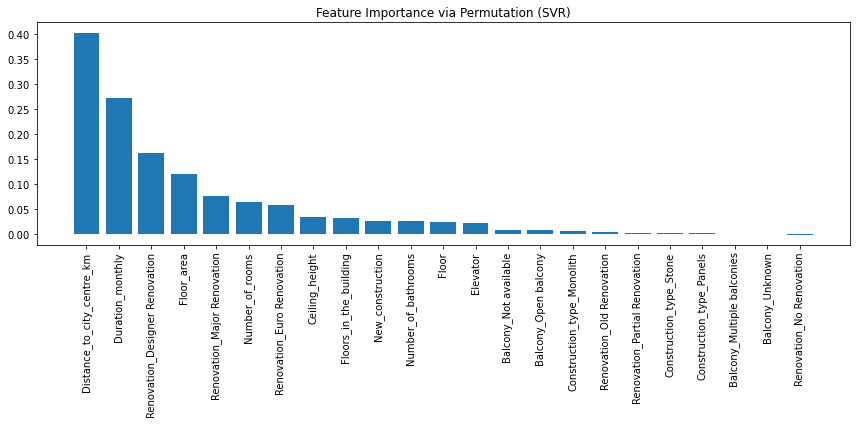

In [34]:
# Encode categorical variables
df_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

# Scale numerical variables
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_vars]), columns=numerical_vars)

# Combine features
X = pd.concat([df_encoded, df_scaled], axis=1)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(svr_model, X_test, y_test, n_repeats=10, random_state=42)

# Visualise importance
importances = result.importances_mean
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importance via Permutation (SVR)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# EOF